# DỰ ĐOÁN GIÁ NHÀ TẠI HÀ NỘI BẰNG MACHINE LEARNING

## I. Orverview Data

## II. TIỀN XỬ LÝ DỮ LIỆU

### 2.1 Review Dataset

- Thiết lập các thư viện cần thiết cho việc làm sạch dữ liệu

In [ ]:
!pip install category_encoders

: 

In [2]:
!pip install xgboost


In [1]:
import pandas as pd   # Pandas để cleaning data
import numpy as np
import seaborn as sns  # Seaborn để vẽ biểu đồ phức tạp
import matplotlib.pyplot as plt # Matplotlib để vẽ biểu đồ
import category_encoders as ce # Thư viện hỗ trợ Target Encoding
from sklearn.preprocessing import LabelEncoder # Thư viện hỗ trợ Label Encoding
from sklearn.model_selection import train_test_split # Thư viện hỗ trợ chia dataset
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Các chỉ số đánh giá

# Linear Regression
from sklearn.linear_model import LinearRegression

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Gradient Bosting
from sklearn.ensemble import GradientBoostingRegressor





In [3]:
print("Helo World")

Helo World


- Đọc dữ liệu từ file .csv

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/VN_housing_dataset.csv')
display(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/VN_housing_dataset.csv'

- Xem qua cấu trúc của dataframe và các giá trị null

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82497 entries, 0 to 82496
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       82496 non-null  float64
 1   Ngày             82496 non-null  object 
 2   Địa chỉ          82449 non-null  object 
 3   Quận             82495 non-null  object 
 4   Huyện            82449 non-null  object 
 5   Loại hình nhà ở  82465 non-null  object 
 6   Giấy tờ pháp lý  53610 non-null  object 
 7   Số tầng          36399 non-null  object 
 8   Số phòng ngủ     82458 non-null  object 
 9   Diện tích        82495 non-null  object 
 10  Dài              19827 non-null  object 
 11  Rộng             35445 non-null  object 
 12  Giá/m2           82484 non-null  object 
dtypes: float64(1), object(12)
memory usage: 8.2+ MB
None


### 2.2 Làm sạch dữ liệu

- Ta sẽ xóa cột Unnamed do không cần thiết

In [6]:
df = df.drop(columns='Unnamed: 0')

- Nhận thấy rất nhiều cột có chứa giá trị Null. Ta sẽ tiến hành xử lý việc này ở các bước sau
- Ta sẽ kiểm tra sự trùng lặp trong dataframe

In [7]:
print(df.duplicated().sum())

815


- Như vậy ta thấy có 815 bản ghi trùng lặp chiếm khoảng 1% dữ liệu của dataset nên ta sẽ loại bỏ các bản ghi trùng lặp này

In [8]:
df = df.drop_duplicates()
df_rows = df.shape
print('Số hàng và số cột còn lại là:',df.shape)

Số hàng và số cột còn lại là: (81682, 12)


- Ta sẽ kiểm tra các giá trị Null ở mỗi cột

In [9]:
df.isnull().sum()/len(df)*100

,0
Ngày,0.001224
Địa chỉ,0.058764
Quận,0.002449
Huyện,0.058764
Loại hình nhà ở,0.039176
Giấy tờ pháp lý,34.795916
Số tầng,55.658529
Số phòng ngủ,0.047746
Diện tích,0.002449
Dài,75.823315


- Như vậy ta thấy các cột như giấy tờ pháp lý, số tầng, chiều dài, chiều rộng có rất nhiều giá trị NULL
- Trong đó các cột liên quan đến địa chỉ và ngày chiếm rất ít. Như vậy nếu một bản ghi thiếu 5 cột sẽ là vô nghĩa nên ta sẽ loại bỏ các hàng có 5 cột không có dữ liệu trở lên

In [10]:
df.dropna(thresh=df.shape[1] - 5, inplace=True)
df.isnull().sum()/len(df)*100

,0
Ngày,0.000000
Địa chỉ,0.026944
Quận,0.001225
Huyện,0.023269
Loại hình nhà ở,0.033067
Giấy tờ pháp lý,34.771959
Số tầng,55.642238
Số phòng ngủ,0.045314
Diện tích,0.001225
Dài,75.814432


- Ta đã loại bỏ tổng thể. Bây giờ ta sẽ tiến hành kiểm tra chi tiết từng cột một
- Bắt đầu với cột giá bán cũng là yếu tố quan trọng nhất của bài toán

In [11]:
df[df["Giá/m2"].isnull()].shape[0]

12

- 12 dòng không có giá bán, đây là yếu tố không thể bổ sung nên ta sẽ tiến hành loại bỏ luôn 12 dòng này

In [12]:
df.dropna(subset=['Giá/m2'], inplace=True)

- Do các cột liên quan đến diện tích căn nhà có thể xử lý dựa vào các yếu tố còn lại nên ta sẽ xử lý sau.
- Ta sẽ cùng chuyển qua kiểm tra các cột quận huyện

In [13]:
df[df["Quận"].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
48418,2020-07-03,"68, Ngọc Hồi, Hà Nội",NaN,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,71 m²,6 m,6 m,43 triệu/m²


- Vậy là chỉ có một dòng thiếu đi quận vô tình cũng thiếu luôn cả huyện nên ta sẽ sử dụng địa chỉ để bổ sung dữ liệu cho dòng này

In [14]:
df.loc[48418,'Quận'] = 'Thanh Trì'
df.loc[48418,'Huyện'] = 'Ngọc Hồi'
print(df.loc[48418])

Ngày                         2020-07-03
Địa chỉ            68, Ngọc Hồi, Hà Nội
Quận                          Thanh Trì
Huyện                          Ngọc Hồi
Loại hình nhà ở            Nhà ngõ, hẻm
Giấy tờ pháp lý                Đã có sổ
Số tầng                             NaN
Số phòng ngủ                    2 phòng
Diện tích                         71 m²
Dài                                 6 m
Rộng                                6 m
Giá/m2                      43 triệu/m²
Name: 48418, dtype: object


- Kiểm tra sang cột Huyện

In [15]:
df[df['Huyện'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
324,2020-08-04,"Đường An Dương Vương, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,77 m²,11 m,7 m,"97,4 triệu/m²"
741,2020-08-04,"Cầu Khê Tang, Quận Hà Đông, Hà Nội",Quận Hà Đông,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,36 m²,NaN,NaN,"43,06 triệu/m²"
8584,2020-07-31,NaN,Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,33 m²,NaN,4.1 m,"90,91 triệu/m²"
29300,2020-07-18,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,24 m²,NaN,NaN,"129,17 triệu/m²"
35553,2020-07-14,"Đường Thịnh Hào 3, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,36 m²,NaN,NaN,100 triệu/m²
40906,2020-07-09,"Đường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà mặt phố, mặt tiền",NaN,NaN,4 phòng,40 m²,NaN,NaN,"82,5 triệu/m²"
46176,2020-07-06,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,50 m²,NaN,NaN,80 triệu/m²
54426,2020-06-29,"Đường Trần Duy Hưng, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,40 m²,NaN,NaN,140 triệu/m²
58641,2020-06-25,"Đường Bùi Xương Trạch, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,31 m²,NaN,NaN,"116,13 triệu/m²"
61781,2020-06-23,"Đường Tôn Thất Tùng, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,37 m²,NaN,NaN,"110,81 triệu/m²"



*   Do không còn cách nào để bổ xung cột quận nên ta sẽ loại bỏ 18 bản ghi trong dataframe luôn





In [16]:
df.dropna(subset=['Huyện'],inplace = True)
df[df['Huyện'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2


- Kiểm tra cột địa chỉ tổng của dataset. Lưu ý Địa chỉ = (Số nhà, đường, ngách,..) + Huyện + Quận + Hà Nội
- Nhận thấy trong cột quận có nhiều các vùng như Huyện, Thị xã,... Để phục vụ các mô hình học máy ta sẽ loại bỏ các yếu tố đó và chỉ giữ lại tên của quận hoặc huyện trực thuộc thành phố Hà Nội. Đồng thời cũng loại bỏ khoảng trắng ở đầu và cuối quận.

In [17]:
df['Quận'] = df['Quận'].str.replace('Thị xã', '').str.replace('Huyện', '').str.replace('Quận', '')
print(df.head())


         Ngày                                            Địa chỉ  \
0  2020-08-05  Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...   
1  2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   
2  2020-08-05  phố minh khai, Phường Minh Khai, Quận Hai Bà T...   
3  2020-08-05  Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...   
4  2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   

            Quận             Huyện        Loại hình nhà ở Giấy tờ pháp lý  \
0       Cầu Giấy   Phường Nghĩa Đô           Nhà ngõ, hẻm        Đã có sổ   
1     Thanh Xuân  Phường Kim Giang  Nhà mặt phố, mặt tiền             NaN   
2   Hai Bà Trưng  Phường Minh Khai           Nhà ngõ, hẻm        Đã có sổ   
3         Tây Hồ  Phường Thụy Khuê           Nhà ngõ, hẻm        Đã có sổ   
4     Thanh Xuân  Phường Kim Giang           Nhà ngõ, hẻm             NaN   

  Số tầng Số phòng ngủ Diện tích      Dài Rộng           Giá/m2  
0       4      5 phòng     46 m²      NaN  NaN   86,96 triệu/m

In [18]:
df['Quận'] = df['Quận'].str.strip()
print(df.head())

         Ngày                                            Địa chỉ  \
0  2020-08-05  Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...   
1  2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   
2  2020-08-05  phố minh khai, Phường Minh Khai, Quận Hai Bà T...   
3  2020-08-05  Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...   
4  2020-08-05  Đường Kim Giang, Phường Kim Giang, Quận Thanh ...   

           Quận             Huyện        Loại hình nhà ở Giấy tờ pháp lý  \
0      Cầu Giấy   Phường Nghĩa Đô           Nhà ngõ, hẻm        Đã có sổ   
1    Thanh Xuân  Phường Kim Giang  Nhà mặt phố, mặt tiền             NaN   
2  Hai Bà Trưng  Phường Minh Khai           Nhà ngõ, hẻm        Đã có sổ   
3        Tây Hồ  Phường Thụy Khuê           Nhà ngõ, hẻm        Đã có sổ   
4    Thanh Xuân  Phường Kim Giang           Nhà ngõ, hẻm             NaN   

  Số tầng Số phòng ngủ Diện tích      Dài Rộng           Giá/m2  
0       4      5 phòng     46 m²      NaN  NaN   86,96 triệu/m²  
1 



*   Ta sẽ tiếp tục kiểm tra sang cột huyện



In [19]:
df['Huyện'].unique()

array(['Phường Nghĩa Đô', 'Phường Kim Giang', 'Phường Minh Khai',
       'Phường Thụy Khuê', 'Phường Yên Hoà', 'Phường Trung Liệt',
       'Phường Đống Mác', 'Phường Xuân La', 'Phường Văn Quán',
       'Thị trấn Văn Điển', 'Phường Định Công', 'Phường Bồ Đề',
       'Phường Quang Trung', 'Phường Thanh Lương', 'Phường Khương Trung',
       'Phường Phúc Tân', 'Phường Gia Thụy', 'Phường Khương Đình',
       'Phường Phương Canh', 'Phường Tương Mai', 'Phường La Khê',
       'Phường Mễ Trì', 'Phường Khương Mai', 'Phường Láng Hạ',
       'Phường Quan Hoa', 'Phường Tây Mỗ', 'Phường Ngọc Khánh',
       'Phường Đại Mỗ', 'Xã Tả Thanh Oai', 'Phường Mỹ Đình 1',
       'Xã Tam Hiệp', 'Phường Cống Vị', 'Phường Bách Khoa',
       'Phường Vĩnh Phúc', 'Xã Kim Chung', 'Phường Đại Kim',
       'Phường Mai Động', 'Phường Trung Tự', 'Phường Kiến Hưng',
       'Phường Trúc Bạch', 'Phường Cổ Nhuế 1', 'Phường Đức Giang',
       'Phường Mỹ Đình 2', 'Phường Bưởi', 'Phường Ô Chợ Dừa',
       'Phường Long Biên', 'P



*   Phần địa chỉ ta đã xử lý xong
*   Tiếp theo ta sẽ kiểm tra sang cột Loại hình nhà ở
*   Trước hết ta sẽ xem có bao nhiêu loại hình nhà ở và có giá trị null không
*   Nếu null ta sẽ tìm cách bổ sung hoặc tiến hành gán nhãn dữ liệu





In [20]:
# Xem có bao nhiêu loại hình nhà ở
df['Loại hình nhà ở'].unique()

array(['Nhà ngõ, hẻm', 'Nhà mặt phố, mặt tiền', 'Nhà biệt thự',
       'Nhà phố liền kề', nan], dtype=object)

In [21]:
# Xem các bản ghi có trường này bị null
df[df['Loại hình nhà ở'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
19888,2020-07-24,"Đường Văn Phú, Phường Phúc La, Quận Hà Đông, H...",Hà Đông,Phường Phúc La,NaN,Đã có sổ,NaN,4 phòng,50 m²,NaN,NaN,136 triệu/m²
23415,2020-07-22,"Đường Võ Chí Công||770, Phường Xuân La, Quận T...",Tây Hồ,Phường Xuân La,NaN,Đã có sổ,NaN,NaN,33 m²,9 m,3.6 m,"93,94 triệu/m²"
26557,2020-07-20,"Đường Thái Hà, Phường Láng Hạ, Quận Đống Đa, H...",Đống Đa,Phường Láng Hạ,NaN,Đã có sổ,NaN,NaN,71 m²,NaN,NaN,"185,92 triệu/m²"
26908,2020-07-20,"Flc Đại Mỗ, Phường Đại Mỗ, Quận Nam Từ Liêm, H...",Nam Từ Liêm,Phường Đại Mỗ,NaN,Đang chờ sổ,NaN,1 phòng,45 m²,NaN,NaN,488.888 đ/m²
27058,2020-07-20,"Đường Trần Quang Diệu, Phường Ô Chợ Dừa, Quận ...",Đống Đa,Phường Ô Chợ Dừa,NaN,Đã có sổ,NaN,NaN,47 m²,NaN,NaN,"276,6 triệu/m²"
29870,2020-07-17,"Đường Xã Đàn 2, Phường Ô Chợ Dừa, Quận Đống Đa...",Đống Đa,Phường Ô Chợ Dừa,NaN,Đã có sổ,NaN,NaN,70 m²,NaN,NaN,"428,57 triệu/m²"
34667,2020-07-14,"Hà Trì - Bà Triệu Hà Đông, Phường Hà Cầu, Quận...",Hà Đông,Phường Hà Cầu,NaN,NaN,NaN,3 phòng,36 m²,NaN,NaN,"76,39 triệu/m²"
34996,2020-07-14,"Đường Phùng Hưng||1864, Phường La Khê, Quận Hà...",Hà Đông,Phường La Khê,NaN,NaN,NaN,4 phòng,50 m²,NaN,NaN,"87,6 triệu/m²"
47742,2020-07-04,"Đường Mỹ Đình, Phường Mỹ Đình 2, Quận Nam Từ L...",Nam Từ Liêm,Phường Mỹ Đình 2,NaN,NaN,NaN,2 phòng,40 m²,NaN,NaN,"66,25 triệu/m²"
51997,2020-07-01,"Đường Quốc lộ 21A, Xã Cổ Đông, Thị xã Sơn Tây,...",Sơn Tây,Xã Cổ Đông,NaN,Đang chờ sổ,NaN,NaN,117 m²,24 m,5 m,"13,68 triệu/m²"




*   Nhận thấy diện tích của các căn nhà này vô cùng đa dạng nên không thể xác định dựa vào yếu tố kinh nghiệm
*   Nên ta sẽ gán nhãn dữ liệu cho các bản ghi này là "Không rõ"



In [22]:
# Thay thế ô null bằng 'Không rõ'
df['Loại hình nhà ở'].fillna('Không rõ', inplace=True)
df[df['Loại hình nhà ở'].isnull()]

<ipython-input-22-a6bf2e262909>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loại hình nhà ở'].fillna('Không rõ', inplace=True)


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2


In [23]:
df['Số tầng'].fillna('Không rõ', inplace=True)
df[df['Số tầng'].isnull()]

<ipython-input-23-20d9e95f9370>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Số tầng'].fillna('Không rõ', inplace=True)


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2




*   Giờ ta sẽ chuyển qua cột Giấy tờ pháp lý để kiểm tra
*   Quy trình kiểm tra vẫn sẽ tương tự với cột loại hình nhà ở



In [24]:
# Lấy ra các loại hình giấy tờ của căn nhà
df['Giấy tờ pháp lý'].unique()

array(['Đã có sổ', nan, 'Đang chờ sổ', 'Giấy tờ khác'], dtype=object)

In [25]:
# Kiểm tra xem có bao nhiêu căn nhà không rõ giấy tờ
df[df['Giấy tờ pháp lý'].isnull()].shape[0]

28379

In [26]:
# Điền giá trị "Không có" cho các ô null
df['Giấy tờ pháp lý'].fillna('Không có', inplace=True)
df[df['Giấy tờ pháp lý'].isnull()]

<ipython-input-26-b72f94036890>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Giấy tờ pháp lý'].fillna('Không có', inplace=True)


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2




*   Kiểm tra số tầng của các căn nhà
*   Quy trình kiểm tra cũng tương tự



In [27]:
# Lấy ra các giá trị duy nhất trong cột 'Số tầng'
df['Số tầng'].unique()

array(['4', 'Không rõ', '6', '5', '7', '2', '3', '8', '1', '9', '50',
       '38', '35', '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73',
       '12', '65', '55', '30', '14', '40', '52', '54', '32', '29'],
      dtype=object)



*   Ngoài các giá trị null ra, ta còn thấy có cả nhãn "Nhiều hơn 10" và rất nhiều outlier
*   Các căn nhà này ta sẽ xử lý sau, giờ ta vẫn sẽ bổ sung các giá trị null



In [28]:
# SỐ các bản ghi có số tầng là null
df[df['Số tầng'].isnull()].shape[0]

0



*   Số lượng bản ghi không rõ số tầng rất lớn nên chắc chắn ta sẽ phải gán nhãn cho các bản ghi này
*   Nhưng hãy kiểm tra nhãn của các bản ghi "Nhiều hơn 10". Nếu số lượng ít và không ảnh hưởng đến mô hình ta sẽ thay nhãn cho các bản ghi này



In [29]:
# Kiểm tra xem có bao nhiêu bản ghi có số tầng lớn hơn 10
df[df['Số tầng']=='Nhiều hơn 10'].shape[0]

7

In [30]:
# Xem xét thông tin chi tiết của 7 bản ghi này
df[df['Số tầng']=='Nhiều hơn 10']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
4755,2020-08-02,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...",Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,9 phòng,146 m²,18 m,8.2 m,"421,92 triệu/m²"
38462,2020-07-11,"Phố Dương Khuê, Phường Mai Dịch, Quận Cầu Giấy...",Cầu Giấy,Phường Mai Dịch,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,nhiều hơn 10 phòng,60 m²,NaN,NaN,240 triệu/m²
63838,2020-06-21,"Đường Hàng Bài, Phường Hàng Bài, Quận Hoàn Kiế...",Hoàn Kiếm,Phường Hàng Bài,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,nhiều hơn 10 phòng,399 m²,39 m,10 m,"601,5 triệu/m²"
68499,2020-06-17,"Đường Bưởi, Phường Vĩnh Phúc, Quận Ba Đình, Hà...",Ba Đình,Phường Vĩnh Phúc,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,nhiều hơn 10 phòng,600 m²,NaN,NaN,400 triệu/m²
71087,2020-06-16,"Đường Trấn Vũ, Phường Trúc Bạch, Quận Ba Đình,...",Ba Đình,Phường Trúc Bạch,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,nhiều hơn 10 phòng,211 m²,26 m,8 m,"417,06 triệu/m²"
79288,2020-06-08,"Đường Dương Khuê, Phường Mai Dịch, Quận Cầu Gi...",Cầu Giấy,Phường Mai Dịch,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,nhiều hơn 10 phòng,60 m²,NaN,NaN,"283,33 triệu/m²"
81860,2020-06-06,"Đường Cầu Giấy, Phường Quan Hoa, Quận Cầu Giấy...",Cầu Giấy,Phường Quan Hoa,"Nhà mặt phố, mặt tiền",Đã có sổ,Nhiều hơn 10,nhiều hơn 10 phòng,179 m²,NaN,9 m,"256,98 triệu/m²"




*   Nhận thấy rằng đây có thể là các khu nhà được xây với mục đích cho thuê hoặc kinh doanh, đồng thời trong danh mục cũng chưa có nhãn 11 tầng nên ta sẽ điền 11 thay cho "Nhiều hơn 10"
*   Đối với các bản ghi null ta sẽ điền "Không rõ"




In [31]:
# Điền giá trị "Không rõ" cho các giá trị null
df['Số tầng'].fillna('Không rõ', inplace=True)
df[df['Số tầng'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2


In [32]:
# Thay nhãn "10" cho "Nhiều hơn 10 tầng"
df.loc[df['Số tầng'] == 'Nhiều hơn 10', 'Số tầng'] = '10'
df[df['Số tầng']=='Nhiều hơn 10']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2


In [33]:
# Kiểm tra 7 bản ghi "11"
df[df['Số tầng']=='10']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
4752,2020-08-02,"Đường Nguyễn Xiển, Phường Thanh Xuân Nam, Quận...",Thanh Xuân,Phường Thanh Xuân Nam,"Nhà mặt phố, mặt tiền",Đã có sổ,10,8 phòng,65 m²,13 m,5 m,"315,38 triệu/m²"
4755,2020-08-02,"Đường Lê Đức Thọ, Phường Mỹ Đình 1, Quận Nam T...",Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà mặt phố, mặt tiền",Đã có sổ,10,9 phòng,146 m²,18 m,8.2 m,"421,92 triệu/m²"
7435,2020-08-01,"phùng hưng, Phường Thanh Xuân Nam, Quận Thanh ...",Thanh Xuân,Phường Thanh Xuân Nam,"Nhà mặt phố, mặt tiền",Đã có sổ,10,10 phòng,2400 m²,NaN,NaN,"18,75 triệu/m²"
11090,2020-07-30,"Đường Nguyễn Xiển, Phường Kim Giang, Quận Than...",Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Đã có sổ,10,nhiều hơn 10 phòng,51 m²,NaN,4 m,"401,96 triệu/m²"
12426,2020-07-29,Đường Hàng Bông,Hoàn Kiếm,Phường Hàng Bông,"Nhà mặt phố, mặt tiền",Đã có sổ,10,10 phòng,163 m²,35 m,4.8 m,"766,87 triệu/m²"
12585,2020-07-29,"phố Hàng Bông, Phường Hàng Bông, Quận Hoàn Kiế...",Hoàn Kiếm,Phường Hàng Bông,"Nhà mặt phố, mặt tiền",Đã có sổ,10,10 phòng,163 m²,35 m,48 m,"766,87 triệu/m²"
13861,2020-07-28,"Đường Nguyễn Trãi, Phường Nguyễn Trãi, Quận Hà...",Hà Đông,Phường Nguyễn Trãi,Nhà biệt thự,Đã có sổ,10,3 phòng,135 m²,NaN,NaN,"28,15 triệu/m²"
17249,2020-07-26,"Đường Trần Duy Hưng, Phường Trung Hoà, Quận Cầ...",Cầu Giấy,Phường Trung Hoà,"Nhà mặt phố, mặt tiền",Đã có sổ,10,nhiều hơn 10 phòng,155 m²,NaN,NaN,"229,03 triệu/m²"
26975,2020-07-20,"Đường Lò Đúc, Phường Đống Mác, Quận Hai Bà Trư...",Hai Bà Trưng,Phường Đống Mác,"Nhà ngõ, hẻm",Đã có sổ,10,5 phòng,70 m²,NaN,5 m,"185,71 triệu/m²"
32474,2020-07-16,"Đường Yết Kiêu, Phường Nguyễn Du, Quận Hai Bà ...",Hai Bà Trưng,Phường Nguyễn Du,"Nhà mặt phố, mặt tiền",Đã có sổ,10,10 phòng,75 m²,NaN,4 m,"533,33 triệu/m²"




*   Kiểm tra đến cột số phòng ngủ
*   Quy trình kiểm tra vẫn sẽ tương tự



In [34]:
df['Số phòng ngủ'].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng',
       nan], dtype=object)

In [35]:
# Đếm số bản ghi bị null
df[df['Số phòng ngủ'].isnull()].shape[0]

37

In [36]:
# Xem chi tiết các bản ghi này
df[df['Số phòng ngủ'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
5478,2020-08-02,"1, Đường Vũ Đức Thuận, Phường Việt Hưng, Quận ...",Long Biên,Phường Việt Hưng,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,NaN,60 m²,15 m,4 m,"99,17 triệu/m²"
13983,2020-07-28,"Xuân Đỉnh, Phường Xuân Đỉnh, Quận Bắc Từ Liêm...",Bắc Từ Liêm,Phường Xuân Đỉnh,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,NaN,100 m²,NaN,6.5 m,42 triệu/m²
21174,2020-07-23,"Đường Trần Bình Trọng, Phường Phương Mai, Quận...",Đống Đa,Phường Phương Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,NaN,49 m²,NaN,NaN,"146,94 triệu/m²"
23415,2020-07-22,"Đường Võ Chí Công||770, Phường Xuân La, Quận T...",Tây Hồ,Phường Xuân La,Không rõ,Đã có sổ,Không rõ,NaN,33 m²,9 m,3.6 m,"93,94 triệu/m²"
26286,2020-07-20,"Đường Đại Đồng, Phường Vĩnh Hưng, Quận Hoàng M...",Hoàng Mai,Phường Vĩnh Hưng,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,NaN,72 m²,20 m,4 m,100 triệu/m²
26557,2020-07-20,"Đường Thái Hà, Phường Láng Hạ, Quận Đống Đa, H...",Đống Đa,Phường Láng Hạ,Không rõ,Đã có sổ,Không rõ,NaN,71 m²,NaN,NaN,"185,92 triệu/m²"
26726,2020-07-20,"Đường Lê Trọng Tấn, Phường Khương Mai, Quận Th...",Thanh Xuân,Phường Khương Mai,"Nhà ngõ, hẻm",Đang chờ sổ,Không rõ,NaN,32 m²,NaN,NaN,"61,88 triệu/m²"
27058,2020-07-20,"Đường Trần Quang Diệu, Phường Ô Chợ Dừa, Quận ...",Đống Đa,Phường Ô Chợ Dừa,Không rõ,Đã có sổ,Không rõ,NaN,47 m²,NaN,NaN,"276,6 triệu/m²"
28834,2020-07-18,"Đường Đặng Thùy Trâm, Phường Cổ Nhuế 1, Quận B...",Bắc Từ Liêm,Phường Cổ Nhuế 1,"Nhà mặt phố, mặt tiền",Không có,Không rõ,NaN,54 m²,NaN,NaN,"37,04 triệu/m²"
29441,2020-07-18,"Đường Đường Láng, Phường Ngã Tư Sở, Quận Đống ...",Đống Đa,Phường Ngã Tư Sở,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,NaN,77 m²,NaN,NaN,"57,79 triệu/m²"


In [37]:
# Ta sẽ xem qua các bản ghi có số phòng ngủ nhiều hơn 10
df[df['Số phòng ngủ']=='nhiều hơn 10 phòng']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
5,2020-08-05,"Đường Yên Hòa, Phường Yên Hoà, Quận Cầu Giấy, ...",Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,nhiều hơn 10 phòng,46 m²,12.1 m,3.8 m,"104,35 triệu/m²"
17,2020-08-05,"Đường Phúc Tân, Phường Phúc Tân, Quận Hoàn Kiế...",Hoàn Kiếm,Phường Phúc Tân,"Nhà mặt phố, mặt tiền",Đã có sổ,7,nhiều hơn 10 phòng,165 m²,NaN,5 m,"103,03 triệu/m²"
56,2020-08-04,"Đường Chùa Láng, Phường Láng Hạ, Quận Đống Đa,...",Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Đã có sổ,6,nhiều hơn 10 phòng,70 m²,17 m,4 m,"114,29 triệu/m²"
170,2020-08-04,"Đường Đường Láng, Phường Láng Hạ, Quận Đống Đa...",Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Không có,Không rõ,nhiều hơn 10 phòng,62 m²,17 m,3.6 m,"282,26 triệu/m²"
284,2020-08-04,"Lê Quang Đạo, Phường Mễ Trì, Quận Nam Từ Liêm,...",Nam Từ Liêm,Phường Mễ Trì,"Nhà ngõ, hẻm",Đã có sổ,6,nhiều hơn 10 phòng,56 m²,9 m,6 m,"130,36 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82304,2020-05-08,"Đường Tân Triều, Phường Thanh Xuân Nam, Quận T...",Thanh Xuân,Phường Thanh Xuân Nam,"Nhà ngõ, hẻm",Đã có sổ,6,nhiều hơn 10 phòng,49 m²,NaN,4 m,"93,88 triệu/m²"
82356,2020-04-17,"Đường Nguyễn Trãi, Phường Thượng Đình, Quận Th...",Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",Đã có sổ,9,nhiều hơn 10 phòng,100 m²,16 m,6 m,115 triệu/m²
82408,2020-03-22,"Đường Tô Ngọc Vân, Phường Quảng An, Quận Tây H...",Tây Hồ,Phường Quảng An,"Nhà mặt phố, mặt tiền",Đã có sổ,8,nhiều hơn 10 phòng,80 m²,NaN,NaN,300 triệu/m²
82441,2020-03-04,"Đường Yết Kiêu, Phường Cửa Nam, Quận Hoàn Kiếm...",Hoàn Kiếm,Phường Cửa Nam,"Nhà ngõ, hẻm",Đã có sổ,10,nhiều hơn 10 phòng,97 m²,NaN,NaN,"381,44 triệu/m²"


In [38]:
# Ta sẽ xem qua số bản ghi có 10 phòng ngủ
df[df['Số phòng ngủ']=='10 phòng']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
121,2020-08-04,"Đường Thái Thịnh 1, Phường Trung Liệt, Quận Đố...",Đống Đa,Phường Trung Liệt,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,10 phòng,120 m²,50 m,6 m,"246,67 triệu/m²"
1549,2020-08-04,"Đường Phú Diễn, Phường Phú Diễn, Quận Bắc Từ L...",Bắc Từ Liêm,Phường Phú Diễn,"Nhà ngõ, hẻm",Đã có sổ,6,10 phòng,50 m²,NaN,NaN,90 triệu/m²
1551,2020-08-04,"Đường Lâm Hạ, Phường Bồ Đề, Quận Long Biên, Hà...",Long Biên,Phường Bồ Đề,"Nhà ngõ, hẻm",Không có,Không rõ,10 phòng,82 m²,NaN,NaN,"109,76 triệu/m²"
1677,2020-08-04,"111, Đường Bạch Mai, Phường Bạch Mai, Quận Hai...",Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",Không có,Không rõ,10 phòng,110 m²,NaN,4.2 m,"209,09 triệu/m²"
1832,2020-08-04,"Phố Pháo Đài Láng, Phường Láng Hạ, Quận Đống Đ...",Đống Đa,Phường Láng Hạ,"Nhà ngõ, hẻm",Không có,Không rõ,10 phòng,41 m²,NaN,NaN,"97,56 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82169,2020-05-26,"ngõ 266, Đường Đội Cấn, Phường Cống Vị, Quận B...",Ba Đình,Phường Cống Vị,"Nhà ngõ, hẻm",Không có,Không rõ,10 phòng,76 m²,NaN,NaN,"197,37 triệu/m²"
82191,2020-05-23,"Số nhà 18, Đường Nguyễn Văn Cừ, Phường Long Bi...",Long Biên,Phường Long Biên,"Nhà mặt phố, mặt tiền",Đã có sổ,9,10 phòng,89 m²,12 m,6 m,"226,97 triệu/m²"
82202,2020-05-21,"Đường Đặng Thai Mai, Phường Quảng An, Quận Tây...",Tây Hồ,Phường Quảng An,"Nhà mặt phố, mặt tiền",Đã có sổ,6,10 phòng,80 m²,NaN,4 m,"306,25 triệu/m²"
82421,2020-03-17,"Đường Chùa Hà, Phường Dịch Vọng, Quận Cầu Giấy...",Cầu Giấy,Phường Dịch Vọng,Nhà phố liền kề,Đã có sổ,Không rõ,10 phòng,43 m²,NaN,NaN,"179,07 triệu/m²"


In [39]:
# Thay thế 'nhiều hơn 10 phòng' bằng '10 phòng'
df.loc[df['Số phòng ngủ']=='nhiều hơn 10 phòng','Số phòng ngủ']='10 phòng'
df[df['Số phòng ngủ']=='10 phòng']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
5,2020-08-05,"Đường Yên Hòa, Phường Yên Hoà, Quận Cầu Giấy, ...",Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,10 phòng,46 m²,12.1 m,3.8 m,"104,35 triệu/m²"
17,2020-08-05,"Đường Phúc Tân, Phường Phúc Tân, Quận Hoàn Kiế...",Hoàn Kiếm,Phường Phúc Tân,"Nhà mặt phố, mặt tiền",Đã có sổ,7,10 phòng,165 m²,NaN,5 m,"103,03 triệu/m²"
56,2020-08-04,"Đường Chùa Láng, Phường Láng Hạ, Quận Đống Đa,...",Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Đã có sổ,6,10 phòng,70 m²,17 m,4 m,"114,29 triệu/m²"
121,2020-08-04,"Đường Thái Thịnh 1, Phường Trung Liệt, Quận Đố...",Đống Đa,Phường Trung Liệt,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,10 phòng,120 m²,50 m,6 m,"246,67 triệu/m²"
170,2020-08-04,"Đường Đường Láng, Phường Láng Hạ, Quận Đống Đa...",Đống Đa,Phường Láng Hạ,"Nhà mặt phố, mặt tiền",Không có,Không rõ,10 phòng,62 m²,17 m,3.6 m,"282,26 triệu/m²"
...,...,...,...,...,...,...,...,...,...,...,...,...
82408,2020-03-22,"Đường Tô Ngọc Vân, Phường Quảng An, Quận Tây H...",Tây Hồ,Phường Quảng An,"Nhà mặt phố, mặt tiền",Đã có sổ,8,10 phòng,80 m²,NaN,NaN,300 triệu/m²
82421,2020-03-17,"Đường Chùa Hà, Phường Dịch Vọng, Quận Cầu Giấy...",Cầu Giấy,Phường Dịch Vọng,Nhà phố liền kề,Đã có sổ,Không rõ,10 phòng,43 m²,NaN,NaN,"179,07 triệu/m²"
82428,2020-03-14,"Đường Khương Hạ, Phường Khương Đình, Quận Than...",Thanh Xuân,Phường Khương Đình,"Nhà mặt phố, mặt tiền",Đã có sổ,4,10 phòng,95 m²,NaN,NaN,"150,53 triệu/m²"
82441,2020-03-04,"Đường Yết Kiêu, Phường Cửa Nam, Quận Hoàn Kiếm...",Hoàn Kiếm,Phường Cửa Nam,"Nhà ngõ, hẻm",Đã có sổ,10,10 phòng,97 m²,NaN,NaN,"381,44 triệu/m²"


In [40]:
# Loại bỏ 37 bản ghi không rõ số phòng ngủ
df.dropna(subset=['Số phòng ngủ'], inplace=True)
df[df['Số phòng ngủ'].isnull()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2




*   Tiếp tục kiểm tra cột Diện tích. Tuy nhiên đây là một trường quan trọng và liên quan trực tiếp đến giá của căn nhà. Đi theo đó là chiều dài và chiều rộng của căn nhà
*   Đặc biệt ở Việt Nam những căn nhà có mặt tiền(chiều rộng) lớn luôn được đánh giá cao hơn
*   Vậy nên ta sẽ tìm cách để bổ sung chiều dài và chiều rộng dù hai cột này có lượng giá trị null rất lớn
*   Ta sẽ sử dụng phương pháp ước lượng như sau:
 *   Với diện tích bị thiếu ta sẽ lấy chiều dài nhân với chiều rộng
 *   Ngược lại nếu chiều nào còn thiếu ta sẽ lấy diện tích chia cho chiều còn lại
 *   Tất nhiên nếu thiếu cả 3 yếu tố ta sẽ loại bỏ bản ghi đó

In [41]:
# Kiểm tra số bản ghi có giá trị diện tích là null
df[df['Diện tích'].isnull()].shape[0]

0



*   Để phục vụ cho việc tính toán các giá trị còn thiếu, ta sẽ tiến hành chuyển đổi kiểu dự liệu của các trường diện tích, dài, rộng về float




In [42]:
# Loại bỏ đơn vị "m2" và chuyển đổi từ object sang float đối với diện tích
df["Diện tích"]=df["Diện tích"].str.replace('m²', '')
df["Diện tích"]=df["Diện tích"].astype(float)
df.head()


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46.0,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không có,Không rõ,3 phòng,37.0,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.0,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,6 phòng,51.0,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không có,Không rõ,4 phòng,36.0,9 m,4 m,"86,11 triệu/m²"


In [43]:
# Sửa đổi tương tự với chiều dài và chiều rộng
df['Dài'] = df['Dài'].str.replace('m', '').astype(float)
df['Rộng'] = df['Rộng'].str.replace('m', '').astype(float)
df.head()

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46.0,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",Không có,Không rõ,3 phòng,37.0,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.0,10.00,4.0,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,6 phòng,51.0,12.75,4.0,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không có,Không rõ,4 phòng,36.0,9.00,4.0,"86,11 triệu/m²"


*   Tuy nhiên nếu cả chiều dài và chiều rộng đều thì sẽ không thể ước lượng được nên ta sẽ xóa các bản ghi có cả chiều dài và rộng không xác định được

In [44]:
# Xóa các bản ghi thiếu cả chiều dài và chiều rộng
df = df.dropna(subset=['Dài', 'Rộng'], how='all')

In [45]:
# Lấy những bản ghi bị thiếu 1 trong 2 chiều ra
df_filtered = df[df['Dài'].isna() | df['Rộng'].isna()]
df_filtered.shape[0]

15784

In [46]:
# Hàm tính toán chiều dài và chiều rộng
def tinh_chieu_dai_rong(row):
    if pd.isnull(row['Rộng']) and pd.notnull(row['Dài']):
        # Nếu chiều rộng là null, tính chiều rộng bằng diện tích chia cho chiều dài và làm tròn
        row['Rộng'] = round(row['Diện tích'] / row['Dài'], 1)
    elif pd.isnull(row['Dài']) and pd.notnull(row['Rộng']):
        # Nếu chiều dài là null, tính chiều dài bằng diện tích chia cho chiều rộng và làm tròn
        row['Dài'] = round(row['Diện tích'] / row['Rộng'], 1)
    return row

# Áp dụng vào chỉnh sửa trên dataframe df_filtered
df_filtered = df_filtered.apply(tinh_chieu_dai_rong, axis=1)

# In kết quả xử lý
print(df_filtered.head())

          Ngày                                            Địa chỉ  \
6   2020-08-05  Đường Tây Sơn, Phường Trung Liệt, Quận Đống Đa...   
7   2020-08-05  Đường Lò Đúc, Phường Đống Mác, Quận Hai Bà Trư...   
9   2020-08-05  Đường 19/5, Phường Văn Quán, Quận Hà Đông, Hà Nội   
13  2020-08-05  Đường Quang Trung, Phường Quang Trung, Quận Hà...   
17  2020-08-05  Đường Phúc Tân, Phường Phúc Tân, Quận Hoàn Kiế...   

            Quận               Huyện        Loại hình nhà ở Giấy tờ pháp lý  \
6        Đống Đa   Phường Trung Liệt           Nhà ngõ, hẻm        Không có   
7   Hai Bà Trưng     Phường Đống Mác  Nhà mặt phố, mặt tiền        Đã có sổ   
9        Hà Đông     Phường Văn Quán           Nhà ngõ, hẻm        Đã có sổ   
13       Hà Đông  Phường Quang Trung           Nhà ngõ, hẻm        Không có   
17     Hoàn Kiếm     Phường Phúc Tân  Nhà mặt phố, mặt tiền        Đã có sổ   

     Số tầng Số phòng ngủ  Diện tích   Dài  Rộng           Giá/m2  
6   Không rõ      3 phòng       52.0  11.6

In [47]:
# Cập nhật vào DataFrame gốc
df.update(df_filtered)

-  Bây giờ ta sẽ kiểm tra các outlier

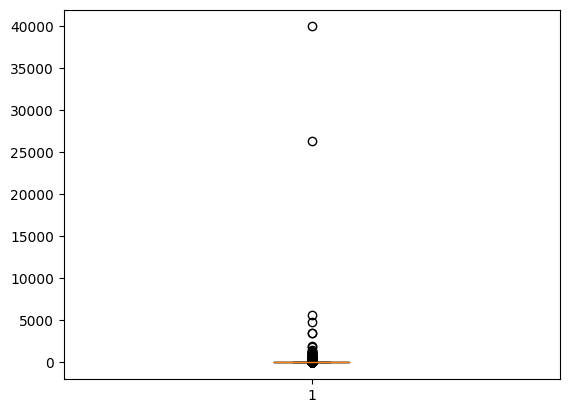

In [48]:
plt.boxplot(df["Diện tích"])
plt.show()

In [49]:
df[df['Diện tích'] <= df['Diện tích'].quantile(0.0005)]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
3597,2020-08-03,"Đường Nguyễn Văn Huyên, Phường Quan Hoa, Quận ...",Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,3 phòng,3.0,9.0,4.0,"1,2 tỷ/m²"
4562,2020-08-03,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,2 phòng,1.0,1.0,1.0,"2,28 tỷ/m²"
4818,2020-08-02,"Đường Quan Nhân, Phường Nhân Chính, Quận Thanh...",Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,4 phòng,3.0,9.0,4.0,"1,166666666 tỷ/m²"
9487,2020-07-31,"Đường Số 1, Phường Long Biên, Quận Long Biên, ...",Long Biên,Phường Long Biên,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,4 phòng,2.0,12.0,4.0,"2,65 tỷ/m²"
10961,2020-07-30,"Đường Phú Đô, Phường Phú Đô, Quận Nam Từ Liêm,...",Nam Từ Liêm,Phường Phú Đô,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,3 phòng,3.0,10.0,3.5,850 triệu/m²
25109,2020-07-21,"Đường Nguyễn Thị Định, Phường Trung Hoà, Quận ...",Cầu Giấy,Phường Trung Hoà,Nhà phố liền kề,Đã có sổ,6,5 phòng,1.0,0.2,5.0,"16,7 tỷ/m²"
29532,2020-07-17,"Đường Quốc lộ 21B, Phường Phú Lãm, Quận Hà Đôn...",Hà Đông,Phường Phú Lãm,"Nhà mặt phố, mặt tiền",Đã có sổ,4,3 phòng,3.0,9.0,35.0,"583,33 triệu/m²"
30922,2020-07-17,"Đường Ngọc Hà, Phường Ngọc Hà, Quận Ba Đình, H...",Ba Đình,Phường Ngọc Hà,"Nhà ngõ, hẻm",Không có,Không rõ,2 phòng,3.0,9.0,3.0,"833,33 triệu/m²"
40901,2020-07-09,"nguyễn xiễn, Phường Hạ Đình, Quận Thanh Xuân, ...",Thanh Xuân,Phường Hạ Đình,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,1.0,5.0,3.0,"1,55 tỷ/m²"
41424,2020-07-09,"Đường Tôn Thất Tùng, Phường Khương Thượng, Quậ...",Đống Đa,Phường Khương Thượng,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,4.0,10.0,4.0,800 triệu/m²


In [50]:
df[df['Diện tích'] >= df['Diện tích'].quantile(0.9998)]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
8353,2020-07-31,"thôn xuân linh, Xã Thủy Xuân Tiên, Huyện Chươn...",Chương Mỹ,Xã Thủy Xuân Tiên,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,1 phòng,1946.0,100.0,20.0,"1,45 triệu/m²"
15202,2020-07-27,"Làng Xa La, Phường Phú La, Quận Hà Đông, Hà Nội",Hà Đông,Phường Phú La,"Nhà ngõ, hẻm",Đã có sổ,2,3 phòng,26400.0,8800.0,3000.0,62.500 đ/m²
24872,2020-07-21,"Đường Đê Trần Khát Chân, Phường Thanh Lương, Q...",Hai Bà Trưng,Phường Thanh Lương,Nhà phố liền kề,Đã có sổ,5,3 phòng,40000.0,87.0,46.0,157.500 đ/m²
36913,2020-07-13,"12, phú cát, Xã Phú Cát, Huyện Quốc Oai, Hà Nội",Quốc Oai,Xã Phú Cát,Nhà biệt thự,Đã có sổ,2,4 phòng,1900.0,60.0,30.0,"8,42 triệu/m²"
37236,2020-07-13,"Phùng Hưng, Phường Nguyễn Trãi, Quận Hà Đông, ...",Hà Đông,Phường Nguyễn Trãi,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,4 phòng,4848.0,8.0,6.0,577.557 đ/m²
53637,2020-06-29,"Khu đô thị mới Cầu Bươu, Xã Tân Triều, Huyện T...",Thanh Trì,Xã Tân Triều,Nhà phố liền kề,Đã có sổ,3,5 phòng,5625.0,1225.0,450.0,746.666 đ/m²
60611,2020-06-23,"la phù, Xã La Phù, Huyện Hoài Đức, Hà Nội",Hoài Đức,Xã La Phù,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,3 phòng,3505.0,10.0,3.0,641.940 đ/m²
81650,2020-06-06,"Đường Thôn, Xã Vân Hòa, Huyện Ba Vì, Hà Nội",Ba Vì,Xã Vân Hòa,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,3 phòng,3500.0,3100.0,400.0,2 triệu/m²


-  Nhận thấy giữa giá nhà và diện tích là không hợp lý và hoàn toàn sai nên ta sẽ loại bỏ những bản ghi này

In [51]:
min_=df['Diện tích'].quantile(0.0005)
max_=df['Diện tích'].quantile(0.9998)

df=df[df['Diện tích'] >= min_]
df=df[df['Diện tích'] <= max_]

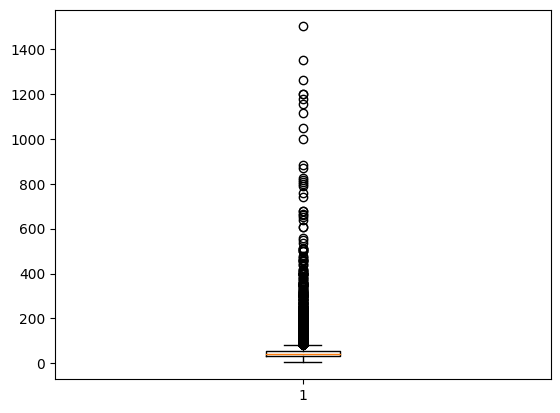

In [52]:
# Kiểm tra lại các outlier
plt.boxplot(df["Diện tích"])
plt.show()

-  Ta sẽ kiểm tra cột Giá đồng thời cũng tìm kiếm và loại bỏ các outlier

In [53]:
# Thêm thư viện re để xử lý chuỗi ký tự
import re
# Sử dụng biểu thức lambda để tách phần số và phần đơn vị ra vào tạo thành cột Đơn vị
df['Đơn vị'] = df['Giá/m2'].apply(lambda x: re.findall(r'[^\d.,]+', x)[0])
# Xem có tất cả bao nhiêu đơn vị tiền tệ
df['Đơn vị'].unique()

array([' triệu/m²', ' đ/m²', ' tỷ/m²'], dtype=object)



*   Như vậy có 3 loại đơn vị chính
*   Ta sẽ kiểm tra xem đơn vị nào chiếm phần lớn



In [54]:
# Thống kê số lần xuất hiện 3 loại đơn vị
df['Đơn vị'].value_counts()

,count
Đơn vị,
triệu/m²,34944
đ/m²,372
tỷ/m²,55


* Như vậy đơn vị triệu/m2 chiếm phần lớn nên ta sẽ đổi các đơn vị còn lại về hết triệu/m2
* Cùng xem qua cấu trúc của các ô đơn vị như thế nào

In [55]:
df[df["Đơn vị"]==' đ/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị
93,2020-08-04,"Đường Hàm Nghi, Phường Cầu Diễn, Quận Nam Từ L...",Nam Từ Liêm,Phường Cầu Diễn,Nhà phố liền kề,Đã có sổ,5,4 phòng,113.0,14.1,8.0,247.787 đ/m²,đ/m²
338,2020-08-04,"Ngõ 405, Đường Ngọc Thụy, Phường Ngọc Thụy, Qu...",Long Biên,Phường Ngọc Thụy,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,3 phòng,140.0,21.0,6.8,178.571 đ/m²,đ/m²
351,2020-08-04,"Nguyễn Chính, Phường Tân Mai, Quận Hoàng Mai, ...",Hoàng Mai,Phường Tân Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,5,6 phòng,60.0,15.0,4.0,125.000 đ/m²,đ/m²
1393,2020-08-04,"Đường Chính Kinh, Phường Nhân Chính, Quận Than...",Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,6,3 phòng,36.0,5.1,7.0,76.388 đ/m²,đ/m²
1833,2020-08-04,"Đường Mỹ Đình, Phường Mỹ Đình 1, Quận Nam Từ L...",Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà mặt phố, mặt tiền",Đã có sổ,1,1 phòng,78.0,23.6,3.3,93.589 đ/m²,đ/m²
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81348,2020-06-06,"Đường Phạm Hồng Thái, Phường Quán Thánh, Quận ...",Ba Đình,Phường Quán Thánh,"Nhà mặt phố, mặt tiền",Đã có sổ,2,5 phòng,68.0,15.0,5.0,341.176 đ/m²,đ/m²
81622,2020-06-06,"Đường Mễ Trì, Phường Mễ Trì, Quận Nam Từ Liêm,...",Nam Từ Liêm,Phường Mễ Trì,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,4 phòng,35.0,9.0,4.0,78.571 đ/m²,đ/m²
82093,2020-06-06,"Đường Hoàng Mai, Phường Hoàng Văn Thụ, Quận Ho...",Hoàng Mai,Phường Hoàng Văn Thụ,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,30.0,5.5,5.5,81.666 đ/m²,đ/m²
82099,2020-06-05,"Đường Minh Khai, Phường Minh Khai, Quận Hai Bà...",Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Không có,Không rõ,3 phòng,32.0,10.7,3.0,98.437 đ/m²,đ/m²


In [56]:
df[df["Đơn vị"]==' triệu/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.0,10.00,4.0,65 triệu/m²,triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,6 phòng,51.0,12.75,4.0,100 triệu/m²,triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không có,Không rõ,4 phòng,36.0,9.00,4.0,"86,11 triệu/m²",triệu/m²
5,2020-08-05,"Đường Yên Hòa, Phường Yên Hoà, Quận Cầu Giấy, ...",Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,10 phòng,46.0,12.10,3.8,"104,35 triệu/m²",triệu/m²
6,2020-08-05,"Đường Tây Sơn, Phường Trung Liệt, Quận Đống Đa...",Đống Đa,Phường Trung Liệt,"Nhà ngõ, hẻm",Không có,Không rõ,3 phòng,52.0,11.60,4.5,"112,5 triệu/m²",triệu/m²
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82357,2020-04-17,"Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, H...",Ba Đình,Phường Đội Cấn,"Nhà ngõ, hẻm",Đã có sổ,6,2 phòng,20.0,5.00,4.0,85 triệu/m²,triệu/m²
82359,2020-04-17,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Đống Đa,Phường Nam Đồng,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,80.0,14.00,5.0,"262,5 triệu/m²",triệu/m²
82360,2020-04-16,"Đường Xã Đàn, Phường Thổ Quan, Quận Đống Đa, H...",Đống Đa,Phường Thổ Quan,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,34.0,11.30,3.0,"85,29 triệu/m²",triệu/m²
82361,2020-04-15,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Đống Đa,Phường Khâm Thiên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,89.0,20.00,4.0,"258,43 triệu/m²",triệu/m²


In [57]:
df[df["Đơn vị"]==' tỷ/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị
3795,2020-08-03,"16-18, Đường Bát Sứ, Phường Hàng Bồ, Quận Hoàn...",Hoàn Kiếm,Phường Hàng Bồ,"Nhà mặt phố, mặt tiền",Đã có sổ,8,10 phòng,126.0,15.00,8.0,"1,111111111 tỷ/m²",tỷ/m²
4003,2020-08-03,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",Không có,Không rõ,4 phòng,50.0,10.00,5.0,"1,8 tỷ/m²",tỷ/m²
6876,2020-08-01,"Đường Nhân Hòa, Phường Thanh Xuân Trung, Quận ...",Thanh Xuân,Phường Thanh Xuân Trung,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,50.0,12.50,4.0,"1,06 tỷ/m²",tỷ/m²
8025,2020-07-31,"Đường Lê Quang Đạo, Phường Phú Đô, Quận Nam Từ...",Nam Từ Liêm,Phường Phú Đô,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,30.0,10.00,3.0,"1,133333333 tỷ/m²",tỷ/m²
8193,2020-07-31,"Đường Trung Kính, Phường Trung Hoà, Quận Cầu G...",Cầu Giấy,Phường Trung Hoà,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,45.0,9.00,5.0,"2,1001 tỷ/m²",tỷ/m²
12407,2020-07-29,"33, Lê Lai, Phường Lý Thái Tổ, Quận Hoàn Kiếm,...",Hoàn Kiếm,Phường Lý Thái Tổ,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,3 phòng,143.0,24.00,6.0,"1,594405594 tỷ/m²",tỷ/m²
12490,2020-07-29,"44, Lê Lợi, Phường Tràng Tiền, Quận Hoàn Kiếm...",Hoàn Kiếm,Phường Tràng Tiền,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,3 phòng,144.0,24.00,6.0,"1,597222222 tỷ/m²",tỷ/m²
13298,2020-07-29,"4, cù chính lan, Phường Phương Liệt, Quận Than...",Thanh Xuân,Phường Phương Liệt,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,7 phòng,40.0,11.00,3.8,"11,5 tỷ/m²",tỷ/m²
13835,2020-07-28,"21, hoàng mai, Phường Tân Mai, Quận Hoàng Mai,...",Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,40.0,10.00,4.0,"6,5 tỷ/m²",tỷ/m²
13842,2020-07-28,"Đường Hồ Tùng Mậu, Phường Cầu Diễn, Quận Nam T...",Nam Từ Liêm,Phường Cầu Diễn,"Nhà ngõ, hẻm",Đã có sổ,5,8 phòng,48.0,13.00,3.5,1 tỷ/m²,tỷ/m²


* Ta thấy với 3 đơn vị thì giá tiền lại được thể hiện khác nhau nên sẽ có cách xử lý khác nhau
* Vì Giá/m2 đang ở dạng object và chứa cả các ký tự nên để tiện cho việc chuyển đổi ta sẽ loại bỏ chữ và thay thế 1 số ký tự
* Đối với đơn vị triệu/m2 ta sẽ thay dấu ',' bằng dấu '.' sau đó làm tròn lên chữ số thập phân thứ nhất
* Đối với đơn vị đ/m2 ta sẽ dữ nguyên dấu '.'
* Đối với đơn vị tỷ/m2 ta sẽ chuyển thay dấu ',' bằng dấu '.' sau đó cũng làm tròn lên chữ số thập phân thứ nhất
* Trước đó cả 3 đơn vị sẽ được loại bỏ hậu tố đơn vị ở sau

In [58]:
# Loại bỏ khoảng trắng ở cột 'Đơn vị'
df['Đơn vị'] = df['Đơn vị'].str.strip()

In [59]:
# Loại bỏ các hậu tố đơn vị ở cột Giá/m2
df['Giá/m2'] = df['Giá/m2'].str.replace('đ/m²', '').str.replace('triệu/m²', '').str.replace('tỷ/m²', '')

In [60]:
# Hàm thay dấu và làm tròn đối với các trường tương ứng
def replace_comma_in_gia(row):
    if row['Đơn vị'] in ['triệu/m²', 'tỷ/m²']:
        return row['Giá/m2'].replace(',', '.')
    else:
        return row['Giá/m2']

# Áp dùng vào dataframe
df['Giá/m2'] = df.apply(replace_comma_in_gia,axis=1)


In [61]:
# Xem qua kết quả để kiểm tra hàm
df[df["Đơn vị"]=='triệu/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40.0,10.00,4.0,65,triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,6 phòng,51.0,12.75,4.0,100,triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",Không có,Không rõ,4 phòng,36.0,9.00,4.0,86.11,triệu/m²
5,2020-08-05,"Đường Yên Hòa, Phường Yên Hoà, Quận Cầu Giấy, ...",Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,10 phòng,46.0,12.10,3.8,104.35,triệu/m²
6,2020-08-05,"Đường Tây Sơn, Phường Trung Liệt, Quận Đống Đa...",Đống Đa,Phường Trung Liệt,"Nhà ngõ, hẻm",Không có,Không rõ,3 phòng,52.0,11.60,4.5,112.5,triệu/m²
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82357,2020-04-17,"Đường Đội Cấn, Phường Đội Cấn, Quận Ba Đình, H...",Ba Đình,Phường Đội Cấn,"Nhà ngõ, hẻm",Đã có sổ,6,2 phòng,20.0,5.00,4.0,85,triệu/m²
82359,2020-04-17,"Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...",Đống Đa,Phường Nam Đồng,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,80.0,14.00,5.0,262.5,triệu/m²
82360,2020-04-16,"Đường Xã Đàn, Phường Thổ Quan, Quận Đống Đa, H...",Đống Đa,Phường Thổ Quan,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,34.0,11.30,3.0,85.29,triệu/m²
82361,2020-04-15,"Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...",Đống Đa,Phường Khâm Thiên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,89.0,20.00,4.0,258.43,triệu/m²


In [62]:
# Kiểm tra đơn vị tỷ
df[df["Đơn vị"]=='tỷ/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị
3795,2020-08-03,"16-18, Đường Bát Sứ, Phường Hàng Bồ, Quận Hoàn...",Hoàn Kiếm,Phường Hàng Bồ,"Nhà mặt phố, mặt tiền",Đã có sổ,8,10 phòng,126.0,15.00,8.0,1.111111111,tỷ/m²
4003,2020-08-03,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",Không có,Không rõ,4 phòng,50.0,10.00,5.0,1.8,tỷ/m²
6876,2020-08-01,"Đường Nhân Hòa, Phường Thanh Xuân Trung, Quận ...",Thanh Xuân,Phường Thanh Xuân Trung,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,50.0,12.50,4.0,1.06,tỷ/m²
8025,2020-07-31,"Đường Lê Quang Đạo, Phường Phú Đô, Quận Nam Từ...",Nam Từ Liêm,Phường Phú Đô,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,30.0,10.00,3.0,1.133333333,tỷ/m²
8193,2020-07-31,"Đường Trung Kính, Phường Trung Hoà, Quận Cầu G...",Cầu Giấy,Phường Trung Hoà,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,45.0,9.00,5.0,2.1001,tỷ/m²
12407,2020-07-29,"33, Lê Lai, Phường Lý Thái Tổ, Quận Hoàn Kiếm,...",Hoàn Kiếm,Phường Lý Thái Tổ,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,3 phòng,143.0,24.00,6.0,1.594405594,tỷ/m²
12490,2020-07-29,"44, Lê Lợi, Phường Tràng Tiền, Quận Hoàn Kiếm...",Hoàn Kiếm,Phường Tràng Tiền,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,3 phòng,144.0,24.00,6.0,1.597222222,tỷ/m²
13298,2020-07-29,"4, cù chính lan, Phường Phương Liệt, Quận Than...",Thanh Xuân,Phường Phương Liệt,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,7 phòng,40.0,11.00,3.8,11.5,tỷ/m²
13835,2020-07-28,"21, hoàng mai, Phường Tân Mai, Quận Hoàng Mai,...",Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,40.0,10.00,4.0,6.5,tỷ/m²
13842,2020-07-28,"Đường Hồ Tùng Mậu, Phường Cầu Diễn, Quận Nam T...",Nam Từ Liêm,Phường Cầu Diễn,"Nhà ngõ, hẻm",Đã có sổ,5,8 phòng,48.0,13.00,3.5,1,tỷ/m²


In [63]:
df.drop(index=52317,inplace=True) # Xóa dòng có giá sai

In [64]:
df.drop(index=55653,inplace=True) # Xóa dòng có giá sai

In [65]:
# Đưa cột Giá từ đối tượng object về float để thực hiện tính toán
df['Giá/m2'] = df['Giá/m2'].astype(float)

* Bây giờ ta sẽ sử dụng một hàm để đổi đơn vị về triệu/m2

In [66]:
# Hàm chuyển đổi: Tỷ x 1000 và đ x 0.000001
def convert_price(row):
    if row['Đơn vị'] == 'tỷ/m²':
        return round(row['Giá/m2'],1) * 1000
    elif row['Đơn vị'] == 'đ/m²':
        return row['Giá/m2'] * 0.000001
    else:
        return row['Giá/m2']

In [67]:
# Áp dụng hàm vào dataframe gốc và kiểm tra kết quả
df['Giá/m2'] = df.apply(convert_price, axis=1)
df[df['Đơn vị']=='đ/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị
93,2020-08-04,"Đường Hàm Nghi, Phường Cầu Diễn, Quận Nam Từ L...",Nam Từ Liêm,Phường Cầu Diễn,Nhà phố liền kề,Đã có sổ,5,4 phòng,113.0,14.1,8.0,0.000248,đ/m²
338,2020-08-04,"Ngõ 405, Đường Ngọc Thụy, Phường Ngọc Thụy, Qu...",Long Biên,Phường Ngọc Thụy,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,3 phòng,140.0,21.0,6.8,0.000179,đ/m²
351,2020-08-04,"Nguyễn Chính, Phường Tân Mai, Quận Hoàng Mai, ...",Hoàng Mai,Phường Tân Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,5,6 phòng,60.0,15.0,4.0,0.000125,đ/m²
1393,2020-08-04,"Đường Chính Kinh, Phường Nhân Chính, Quận Than...",Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,6,3 phòng,36.0,5.1,7.0,0.000076,đ/m²
1833,2020-08-04,"Đường Mỹ Đình, Phường Mỹ Đình 1, Quận Nam Từ L...",Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà mặt phố, mặt tiền",Đã có sổ,1,1 phòng,78.0,23.6,3.3,0.000094,đ/m²
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81348,2020-06-06,"Đường Phạm Hồng Thái, Phường Quán Thánh, Quận ...",Ba Đình,Phường Quán Thánh,"Nhà mặt phố, mặt tiền",Đã có sổ,2,5 phòng,68.0,15.0,5.0,0.000341,đ/m²
81622,2020-06-06,"Đường Mễ Trì, Phường Mễ Trì, Quận Nam Từ Liêm,...",Nam Từ Liêm,Phường Mễ Trì,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,4 phòng,35.0,9.0,4.0,0.000079,đ/m²
82093,2020-06-06,"Đường Hoàng Mai, Phường Hoàng Văn Thụ, Quận Ho...",Hoàng Mai,Phường Hoàng Văn Thụ,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,30.0,5.5,5.5,0.000082,đ/m²
82099,2020-06-05,"Đường Minh Khai, Phường Minh Khai, Quận Hai Bà...",Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Không có,Không rõ,3 phòng,32.0,10.7,3.0,0.000098,đ/m²


In [68]:
df[df['Đơn vị']=='tỷ/m²']

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Đơn vị
3795,2020-08-03,"16-18, Đường Bát Sứ, Phường Hàng Bồ, Quận Hoàn...",Hoàn Kiếm,Phường Hàng Bồ,"Nhà mặt phố, mặt tiền",Đã có sổ,8,10 phòng,126.0,15.00,8.0,1100.0,tỷ/m²
4003,2020-08-03,"Đường Bạch Mai, Phường Bạch Mai, Quận Hai Bà T...",Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",Không có,Không rõ,4 phòng,50.0,10.00,5.0,1800.0,tỷ/m²
6876,2020-08-01,"Đường Nhân Hòa, Phường Thanh Xuân Trung, Quận ...",Thanh Xuân,Phường Thanh Xuân Trung,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,50.0,12.50,4.0,1100.0,tỷ/m²
8025,2020-07-31,"Đường Lê Quang Đạo, Phường Phú Đô, Quận Nam Từ...",Nam Từ Liêm,Phường Phú Đô,"Nhà ngõ, hẻm",Đã có sổ,5,3 phòng,30.0,10.00,3.0,1100.0,tỷ/m²
8193,2020-07-31,"Đường Trung Kính, Phường Trung Hoà, Quận Cầu G...",Cầu Giấy,Phường Trung Hoà,"Nhà mặt phố, mặt tiền",Đã có sổ,5,4 phòng,45.0,9.00,5.0,2100.0,tỷ/m²
12407,2020-07-29,"33, Lê Lai, Phường Lý Thái Tổ, Quận Hoàn Kiếm,...",Hoàn Kiếm,Phường Lý Thái Tổ,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,3 phòng,143.0,24.00,6.0,1600.0,tỷ/m²
12490,2020-07-29,"44, Lê Lợi, Phường Tràng Tiền, Quận Hoàn Kiếm...",Hoàn Kiếm,Phường Tràng Tiền,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,3 phòng,144.0,24.00,6.0,1600.0,tỷ/m²
13298,2020-07-29,"4, cù chính lan, Phường Phương Liệt, Quận Than...",Thanh Xuân,Phường Phương Liệt,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,7 phòng,40.0,11.00,3.8,11500.0,tỷ/m²
13835,2020-07-28,"21, hoàng mai, Phường Tân Mai, Quận Hoàng Mai,...",Hoàng Mai,Phường Tân Mai,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,40.0,10.00,4.0,6500.0,tỷ/m²
13842,2020-07-28,"Đường Hồ Tùng Mậu, Phường Cầu Diễn, Quận Nam T...",Nam Từ Liêm,Phường Cầu Diễn,"Nhà ngõ, hẻm",Đã có sổ,5,8 phòng,48.0,13.00,3.5,1000.0,tỷ/m²


In [69]:
# Sau khi đã chuyển đổi xong ta sẽ loại bỏ cột 'Đơn vị' và đổi tên cột 'Giá/m2' sang 'Giá (triệu đồng/m2)'
df = df.drop(columns=['Đơn vị'])
df = df.rename(columns={'Giá/m2': 'Giá (triệu đồng/m2)'})


* Bây giờ ta sẽ kiểm tra các outlier tại cột Giá

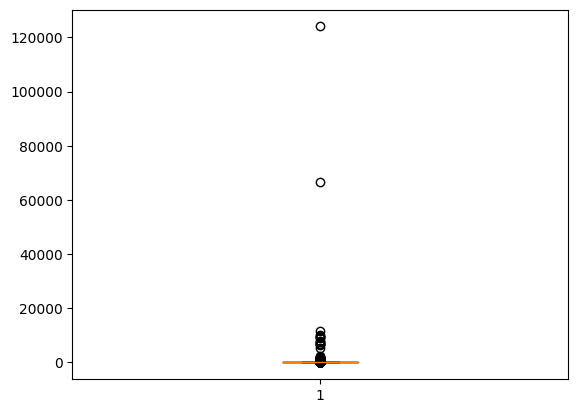

In [70]:
plt.boxplot(df["Giá (triệu đồng/m2)"])
plt.show()

* Vẫn có khá nhiều outlier nên ta sẽ tìm và loại bỏ bớt

In [71]:
# Tính Q1 và Q3
Q1 = df['Giá (triệu đồng/m2)'].quantile(0.25)
Q3 = df['Giá (triệu đồng/m2)'].quantile(0.75)

# Tính IQR
IQR = Q3 - Q1

# Tính ngưỡng dưới và ngưỡng trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [72]:
# Lọc ra những bản ghi nằm ngoài khoảng này
outliers = df[(df['Giá (triệu đồng/m2)'] < lower_bound) | (df['Giá (triệu đồng/m2)'] > upper_bound)]


In [73]:
# In kết quả để kiểm tra
print(outliers)

             Ngày                                            Địa chỉ  \
7      2020-08-05  Đường Lò Đúc, Phường Đống Mác, Quận Hai Bà Trư...   
36     2020-08-04  Đường Nguyễn Chí Thanh, Phường Láng Hạ, Quận Đ...   
63     2020-08-04  Đường Đền Lừ, Phường Hoàng Văn Thụ, Quận Hoàng...   
93     2020-08-04  Đường Hàm Nghi, Phường Cầu Diễn, Quận Nam Từ L...   
100    2020-08-04  Đường Tây Sơn, Phường Ngã Tư Sở, Quận Đống Đa,...   
...           ...                                                ...   
82316  2020-05-07  Đường Láng, Phường Láng Thượng, Quận Đống Đa, ...   
82350  2020-04-21  25, 25 Đường Vũ Ngọc Phan, Phường Láng Hạ, Quậ...   
82354  2020-04-19  Đường Ngụy Như Kon Tum, Phường Nhân Chính, Quậ...   
82359  2020-04-17  Đường Hồ Đắc Di, Phường Nam Đồng, Quận Đống Đa...   
82361  2020-04-15  Đường Khâm Thiên, Phường Khâm Thiên, Quận Đống...   

               Quận                 Huyện        Loại hình nhà ở  \
7      Hai Bà Trưng       Phường Đống Mác  Nhà mặt phố, mặt tiền   

* Nhận thấy để xác định được 3404 dòng có phải outlier hay không ta cần căn cứ vào căn nhà đó thuộc quận nào do các quận nội thành Hà Nội sẽ có giá cao hơn.
* Ta sẽ tiến hành gom nhóm theo quận và tính giới hạn theo từng quận để loại bỏ các outlier tốt hơn

In [74]:
# Tính giới hạn trên và giới hạn dưới cho từng quận(thêm cột giới hạn trên và giới hạn dưới)
df['Lower Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
df['Upper Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))

In [75]:
# Loại bỏ những cột không nằm trong khoảng này và sau đó loại bỏ 2 cột giới hạn trên và giới hạn dưới
df = df[(df['Giá (triệu đồng/m2)'] >= df['Lower Bound']) & (df['Giá (triệu đồng/m2)'] <= df['Upper Bound'])]
df = df.drop(['Lower Bound', 'Upper Bound'], axis=1)

In [76]:
# Kiểm tra lại cấu trúc bảng
df.dtypes

,0
Ngày,object
Địa chỉ,object
Quận,object
Huyện,object
Loại hình nhà ở,object
Giấy tờ pháp lý,object
Số tầng,object
Số phòng ngủ,object
Diện tích,float64
Dài,float64


* Kiểm tra lại outlier 1 lần nữa

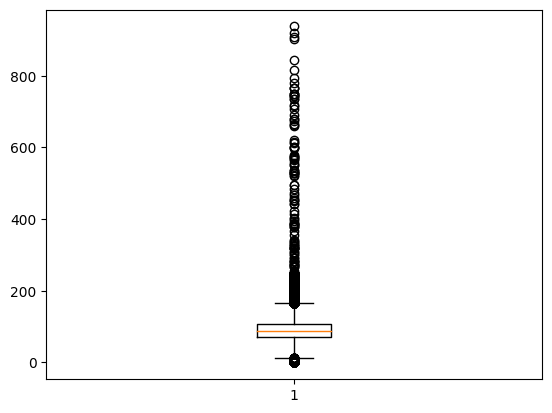

In [77]:
plt.boxplot(df["Giá (triệu đồng/m2)"])
plt.show()

In [78]:
df.describe()  # Xem thống kê tóm tắt

,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
count,32656.00000,32656.000000,32656.000000,32656.000000
mean,48.07477,57.906680,40.110514,93.912974
std,37.02443,5040.416893,3230.952065,44.559260
min,8.00000,0.000000,0.400000,0.000028
25%,34.00000,8.000000,3.800000,70.000000
50%,40.00000,10.000000,4.000000,87.500000
75%,52.00000,12.000000,5.000000,107.840000
max,1500.00000,900000.000000,423432.000000,937.500000


* Dễ dàng nhận thấy max chiều dài và chiệu rộng đang thực sự vô lý nên ta sẽ tìm kiếm và loại bỏ bớt outlier


In [79]:
# Lấy ra dòng có chiều dài lớn nhất
df[df['Dài'] == df['Dài'].max()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
68326,2020-06-17,"Đường Thanh Lân, Phường Lĩnh Nam, Quận Hoàng M...",Hoàng Mai,Phường Lĩnh Nam,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,4 phòng,35.0,900000.0,400000.0,78.57


* Vậy là đã có sai sót trong quá trình thu thập thông tin, ta sẽ sửa đổi về một con số gần đúng
* Ngôi nhà rộng 35 mét vuông nên ta sẽ điều chỉnh lại chiều dài và rộng là 9 và 4

In [80]:
# Sửa chiều dài = 9 và chiều rộng = 4 cho dòng 68326
df.loc[68326, 'Dài'] = 9
df.loc[68326, 'Rộng'] = 4
df.loc[68326]

,68326
Ngày,2020-06-17
Địa chỉ,"Đường Thanh Lân, Phường Lĩnh Nam, Quận Hoàng M..."
Quận,Hoàng Mai
Huyện,Phường Lĩnh Nam
Loại hình nhà ở,"Nhà ngõ, hẻm"
Giấy tờ pháp lý,Đã có sổ
Số tầng,Không rõ
Số phòng ngủ,4 phòng
Diện tích,35.0
Dài,9.0


* Bây giờ ta sẽ kiểm tra sang giá trị max của chiều rộng

In [81]:
# Lấy ra dòng có chiều rộng lớn nhất
df[df['Rộng'] == df['Rộng'].max()]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
74634,2020-06-12,"Đường Minh Khai, Phường Minh Khai, Quận Hai Bà...",Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,3 phòng,31.0,0.0,423432.0,113.87


In [82]:
# Sửa lại chiều rộng bằng 4.2 và tính chiều dài bằng cách lấy diện tích/ chiều rộng của bản ghi 74634
df.loc[74634, 'Rộng'] = 4.2
df.loc[74634, 'Dài'] = round(31/4.2,1)
df.loc[74634]

,74634
Ngày,2020-06-12
Địa chỉ,"Đường Minh Khai, Phường Minh Khai, Quận Hai Bà..."
Quận,Hai Bà Trưng
Huyện,Phường Minh Khai
Loại hình nhà ở,"Nhà ngõ, hẻm"
Giấy tờ pháp lý,Đã có sổ
Số tầng,Không rõ
Số phòng ngủ,3 phòng
Diện tích,31.0
Dài,7.4


* Bây giờ ta sẽ kiểm tra lại dataframe 1 lần nữa

In [83]:
df.describe()

,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
count,32656.00000,32656.000000,32656.00000,32656.000000
mean,48.07477,30.347163,14.89543,93.912974
std,37.02443,776.825303,223.95596,44.559260
min,8.00000,0.000000,0.40000,0.000028
25%,34.00000,8.000000,3.80000,70.000000
50%,40.00000,10.000000,4.00000,87.500000
75%,52.00000,12.000000,5.00000,107.840000
max,1500.00000,120000.000000,26000.00000,937.500000


* Như vậy không chỉ có 1 bản ghi bị nhập sai dữ liệu, ta sẽ lấy ra tất cả các dòng có chiều dài hoặc chiều rộng trên 100 mét
* Sau đó xem xét và đưa về dữ liệu chính xác

In [84]:
# Hàm chuyển đổi chiều rộng
def convert_chieu_dai_rong(row):
    if row['Rộng'] >= 10000:
        return round(row['Rộng']/10000,1)
    elif row['Rộng'] >= 1000 and row['Rộng'] < 10000:
        return round(row['Rộng']/1000,1)
    elif row['Rộng'] >=100 and row['Rộng'] < 1000:
        return round(row['Rộng']/100,1)
    elif row['Rộng'] >20 and row['Rộng'] < 100:
        return round(row['Rộng']/10,1)
    else:
        return row['Rộng']

* Sử dụng hàm để sửa đổi cho dataframe

In [85]:
# Áp dụng vào dataframe gốc
df['Rộng'] = df.apply(convert_chieu_dai_rong, axis = 1)

# Xem kết quả
df.describe()


,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
count,32656.00000,32656.000000,32656.000000,32656.000000
mean,48.07477,30.347163,4.454635,93.912974
std,37.02443,776.825303,1.610466,44.559260
min,8.00000,0.000000,0.400000,0.000028
25%,34.00000,8.000000,3.700000,70.000000
50%,40.00000,10.000000,4.000000,87.500000
75%,52.00000,12.000000,5.000000,107.840000
max,1500.00000,120000.000000,20.000000,937.500000


* Tính lại chiều dài từ chiều rộng và diện tích

In [86]:
# Hàm tính lại chiều dài
def tinh_chieu_dai(row):
    return round(row['Diện tích']/row['Rộng'],1)

# Áp dụng vào dataframe
df['Dài'] = df.apply(tinh_chieu_dai, axis=1)

# Xem kết quả
df.describe()

,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
count,32656.00000,32656.000000,32656.000000,32656.000000
mean,48.07477,10.952039,4.454635,93.912974
std,37.02443,7.571890,1.610466,44.559260
min,8.00000,1.300000,0.400000,0.000028
25%,34.00000,8.300000,3.700000,70.000000
50%,40.00000,10.000000,4.000000,87.500000
75%,52.00000,12.500000,5.000000,107.840000
max,1500.00000,517.200000,20.000000,937.500000


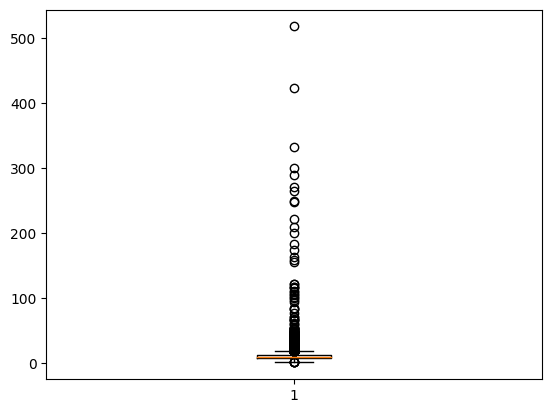

In [87]:
plt.boxplot(df["Dài"])
plt.show()

In [88]:
def tang_chieu_rong(row):
    return row['Rộng']*10

def tinh_chieu_dai(row):
    return round(row['Diện tích']/row['Rộng'],1)


In [89]:
df_rong = df[df['Dài'] >=120]

In [90]:
df_rong.shape[0]

19

In [91]:
df_rong['Rộng'] = df_rong.apply(tang_chieu_rong, axis=1)
df_rong['Dài'] = df_rong.apply(tinh_chieu_dai, axis=1)
df_rong.head(30)

<ipython-input-91-0cab523441ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rong['Rộng'] = df_rong.apply(tang_chieu_rong, axis=1)
<ipython-input-91-0cab523441ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rong['Dài'] = df_rong.apply(tinh_chieu_dai, axis=1)


,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
2204,2020-08-04,"Đường Cầu Giấy, Phường Yên Hoà, Quận Cầu Giấy,...",Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",Không có,Không rõ,10 phòng,1200.0,20.0,60.0,19.920000
9705,2020-07-30,"Ngã Ba Đại Thịnh, Xã Đại Thịnh, Huyện Mê Linh,...",Mê Linh,Xã Đại Thịnh,Nhà biệt thự,Đã có sổ,Không rõ,5 phòng,550.0,18.3,30.0,18.180000
14828,2020-07-28,"Đường Liễu Giai, Phường Liễu Giai, Quận Ba Đìn...",Ba Đình,Phường Liễu Giai,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,2 phòng,1350.0,27.0,50.0,229.630000
16133,2020-07-27,"Đường Quốc lộ 21A||2118, Xã Phú Mãn, Huyện Quố...",Quốc Oai,Xã Phú Mãn,Nhà biệt thự,Đã có sổ,Không rõ,3 phòng,1500.0,51.7,29.0,4.670000
17028,2020-07-26,"Đường Ngô Quyền, Phường Lý Thái Tổ, Quận Hoàn ...",Hoàn Kiếm,Phường Lý Thái Tổ,"Nhà mặt phố, mặt tiền",Đã có sổ,3,5 phòng,665.0,22.2,30.0,529.320000
36143,2020-07-13,"Đường Láng Hạ, Phường Láng Hạ, Quận Đống Đa, H...",Đống Đa,Phường Láng Hạ,Nhà phố liền kề,Đã có sổ,6,9 phòng,652.0,16.3,40.0,14.880000
44905,2020-07-07,"QL21, Đường Quốc lộ 21, Phường Ngô Quyền, Thị ...",Sơn Tây,Phường Ngô Quyền,"Nhà mặt phố, mặt tiền",Đã có sổ,4,4 phòng,677.0,42.3,16.0,0.000056
46407,2020-07-06,"26, số nhà 26 tổ 4 xuân khanh, Phường Xuân Kha...",Sơn Tây,Phường Xuân Khanh,"Nhà ngõ, hẻm",Đã có sổ,Không rõ,2 phòng,871.0,26.4,33.0,2.300000
46901,2020-07-05,"Đường Trương Công Giai, Phường Dịch Vọng, Quận...",Cầu Giấy,Phường Dịch Vọng,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,606.0,12.1,50.0,14.850000
48463,2020-07-03,"Đường Tây Thăng Long, Thị trấn Phùng, Huyện Đa...",Đan Phượng,Thị trấn Phùng,Nhà biệt thự,Đã có sổ,Không rõ,6 phòng,250.0,25.0,10.0,27.200000


In [92]:
df.update(df_rong)
df.describe()

,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
count,32656.00000,32656.000000,32656.000000,32656.000000
mean,48.07477,10.825282,4.472549,93.912974
std,37.02443,4.554411,1.806636,44.559260
min,8.00000,1.300000,0.400000,0.000028
25%,34.00000,8.300000,3.700000,70.000000
50%,40.00000,10.000000,4.000000,87.500000
75%,52.00000,12.500000,5.000000,107.840000
max,1500.00000,116.700000,68.000000,937.500000


In [93]:
# lấy ra những dòng có diện tích lớn hơn 1000
df[df['Diện tích'] >= 1000]

,Ngày,Địa chỉ,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
2204,2020-08-04,"Đường Cầu Giấy, Phường Yên Hoà, Quận Cầu Giấy,...",Cầu Giấy,Phường Yên Hoà,"Nhà ngõ, hẻm",Không có,Không rõ,10 phòng,1200.0,20.0,60.0,19.92
14828,2020-07-28,"Đường Liễu Giai, Phường Liễu Giai, Quận Ba Đìn...",Ba Đình,Phường Liễu Giai,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,2 phòng,1350.0,27.0,50.0,229.63
16133,2020-07-27,"Đường Quốc lộ 21A||2118, Xã Phú Mãn, Huyện Quố...",Quốc Oai,Xã Phú Mãn,Nhà biệt thự,Đã có sổ,Không rõ,3 phòng,1500.0,51.7,29.0,4.67
28388,2020-07-18,"Đường 21A, Xã Thạch Hoà, Huyện Thạch Thất, Hà Nội",Thạch Thất,Xã Thạch Hoà,"Nhà mặt phố, mặt tiền",Đã có sổ,2,4 phòng,1050.0,105.0,10.0,7.62
48831,2020-07-03,"Tổ 47, Đường Uy Nỗ, Thị trấn Đông Anh, Huyện Đ...",Đông Anh,Thị trấn Đông Anh,"Nhà mặt phố, mặt tiền",Đã có sổ,2,4 phòng,1179.0,17.3,68.0,6.36
50397,2020-07-02,"Đường Ngõ Giếng, Phường Ô Chợ Dừa, Quận Đống Đ...",Đống Đa,Phường Ô Chợ Dừa,"Nhà mặt phố, mặt tiền",Đã có sổ,Không rõ,4 phòng,1200.0,66.7,18.0,154.17
78244,2020-06-09,"Đường Đình Xuyên, Xã Đình Xuyên, Huyện Gia Lâm...",Gia Lâm,Xã Đình Xuyên,"Nhà mặt phố, mặt tiền",Đã có sổ,3,3 phòng,1154.0,28.9,40.0,6.07
82131,2020-06-01,"Đường Đào Tấn, Phường Cống Vị, Quận Ba Đình, H...",Ba Đình,Phường Cống Vị,"Nhà mặt phố, mặt tiền",Đã có sổ,29,10 phòng,1260.0,33.2,38.0,246.03


* Thống kê các dòng trùng lặp 1 lần nữa

In [94]:
sum(df.duplicated())

34

In [95]:
df=df.drop_duplicates()

In [96]:
df.shape[0]

32622

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32622 entries, 2 to 82362
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ngày                 32622 non-null  object 
 1   Địa chỉ              32622 non-null  object 
 2   Quận                 32622 non-null  object 
 3   Huyện                32622 non-null  object 
 4   Loại hình nhà ở      32622 non-null  object 
 5   Giấy tờ pháp lý      32622 non-null  object 
 6   Số tầng              32622 non-null  object 
 7   Số phòng ngủ         32622 non-null  object 
 8   Diện tích            32622 non-null  float64
 9   Dài                  32622 non-null  float64
 10  Rộng                 32622 non-null  float64
 11  Giá (triệu đồng/m2)  32622 non-null  float64
dtypes: float64(4), object(8)
memory usage: 3.2+ MB


* Do đây là dữ liệu từ từ 2 năm 2019 và 2020 nên cột ngày ta sẽ chỉ giữ lại năm để phân biệt giữa 2 ngôi nhà
* Cột địa chỉ ta sẽ loại bỏ do đã không dùng tới
* Cuối cùng ta sẽ chuyển đổi các kiểu dữ liệu của các trường 1 lần nữa


In [98]:
# Chuyển đổi cột 'Ngày' về date sau đó chỉ giữ lại năm
df['Ngày'] = pd.to_datetime(df['Ngày']).dt.year
df['Ngày'].unique()

array([2020], dtype=int32)

* Vậy là trong quá trình xử lý dữ liệu có vẻ các bản ghi 2019 quá nhiều lỗi nên đã bị xóa hết
* Như vậy ta sẽ xóa bỏ cột ngày
* Cột địa chỉ ta sẽ lưu sang một file csv khác đề phòng cần backup lại


In [99]:
df.drop('Ngày', axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32622 entries, 2 to 82362
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Địa chỉ              32622 non-null  object 
 1   Quận                 32622 non-null  object 
 2   Huyện                32622 non-null  object 
 3   Loại hình nhà ở      32622 non-null  object 
 4   Giấy tờ pháp lý      32622 non-null  object 
 5   Số tầng              32622 non-null  object 
 6   Số phòng ngủ         32622 non-null  object 
 7   Diện tích            32622 non-null  float64
 8   Dài                  32622 non-null  float64
 9   Rộng                 32622 non-null  float64
 10  Giá (triệu đồng/m2)  32622 non-null  float64
dtypes: float64(4), object(7)
memory usage: 3.0+ MB


In [100]:
# Chuyển cột địa chỉ sang df_dia_chi
#df_dia_chi = df[['Địa chỉ']].copy()

# Lưu df_dia_chi thành file csv và lưu vào drive của tôi
#df_dia_chi.to_csv('/content/drive/MyDrive/Colab Notebooks/df_dia_chi.csv', index=False)

In [101]:
# Xóa cột 'Địa chỉ' khỏi df
df.drop('Địa chỉ', axis=1, inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32622 entries, 2 to 82362
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Quận                 32622 non-null  object 
 1   Huyện                32622 non-null  object 
 2   Loại hình nhà ở      32622 non-null  object 
 3   Giấy tờ pháp lý      32622 non-null  object 
 4   Số tầng              32622 non-null  object 
 5   Số phòng ngủ         32622 non-null  object 
 6   Diện tích            32622 non-null  float64
 7   Dài                  32622 non-null  float64
 8   Rộng                 32622 non-null  float64
 9   Giá (triệu đồng/m2)  32622 non-null  float64
dtypes: float64(4), object(6)
memory usage: 2.7+ MB


* Bây giờ ta sẽ kiểm tra lại các cột số tầng và số phòng ngủ để chuyển đổi kiểu dữ liệu


In [103]:
# Xem các giá trị của cột số tầng và số phòng ngủ
df['Số tầng'].unique()

array(['4', 'Không rõ', '5', '7', '2', '3', '6', '1', '9', '8', '50',
       '10', '33', '45', '42', '73', '35', '12', '65', '55', '52', '32',
       '29'], dtype=object)

* Ta dễ dàng nhận thấy số tầng so với diện tích đang vô lý
* Ta sẽ chuyển các bản ghi không rõ số tầng về nhãn 0
* Sau đó chuyển đổi cột này về dạng số để chỉnh sửa số tầng của các căn nhà này

In [104]:
# Gán '0' cho các dòng có cột 'Số tầng' == Không rõ
df.loc[df['Số tầng'] == 'Không rõ', 'Số tầng'] = '0'
df['Số tầng'].unique()


array(['4', '0', '5', '7', '2', '3', '6', '1', '9', '8', '50', '10', '33',
       '45', '42', '73', '35', '12', '65', '55', '52', '32', '29'],
      dtype=object)

In [105]:
df[df['Số tầng']=='0'].shape[0]

12231

In [106]:
# Chuyển đổi cột 'Số tầng' về dạng float
df['Số tầng'] = df['Số tầng'].astype(float)

In [107]:
# Lấy ra những dòng có 'Số tầng' > 20
df[df['Số tầng'] > 20]

,Quận,Huyện,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
2627,Long Biên,Phường Thạch Bàn,"Nhà ngõ, hẻm",Đã có sổ,50.0,3 phòng,30.0,7.5,4.00,75.00
12476,Cầu Giấy,Phường Trung Hoà,"Nhà ngõ, hẻm",Đã có sổ,33.0,2 phòng,21.0,6.4,3.30,104.76
13406,Đan Phượng,Thị trấn Phùng,Nhà biệt thự,Giấy tờ khác,45.0,6 phòng,200.0,25.0,8.00,25.00
14365,Long Biên,Phường Phúc Lợi,"Nhà ngõ, hẻm",Đã có sổ,45.0,3 phòng,30.0,6.7,4.45,61.67
19330,Long Biên,Phường Phúc Lợi,"Nhà ngõ, hẻm",Đã có sổ,45.0,3 phòng,30.0,6.0,5.00,63.00
22763,Đống Đa,Phường Quang Trung,"Nhà ngõ, hẻm",Đã có sổ,42.0,3 phòng,42.0,10.5,4.00,72.62
28045,Thanh Xuân,Phường Khương Đình,"Nhà ngõ, hẻm",Đã có sổ,45.0,2 phòng,32.0,9.1,3.50,81.25
35627,Tây Hồ,Phường Thụy Khuê,Nhà biệt thự,Đã có sổ,73.0,6 phòng,73.0,14.6,5.00,81.37
38144,Long Biên,Phường Cự Khối,"Nhà ngõ, hẻm",Đã có sổ,35.0,3 phòng,63.0,18.5,3.40,67.46
41446,Hà Đông,Phường Mộ Lao,"Nhà ngõ, hẻm",Đã có sổ,65.0,6 phòng,98.0,12.2,8.00,66.33


* Đối với các căn nhà này số tầng > 20 sẽ được chia cho 10 sau đó làm tròn lên

In [108]:
# Hàm chuyển đổi số tầng
def sua_so_tang(row):
    if row['Số tầng'] > 20:
        return round(row['Số tầng']/10)
    else:
        return row['Số tầng']

# Áp dụng vào df
df['Số tầng'] = df.apply(sua_so_tang,axis=1)

# Xem kết quả
df['Số tầng'].unique()

array([ 4.,  0.,  5.,  7.,  2.,  3.,  6.,  1.,  9.,  8., 10., 12.])

In [109]:
# Chuyển  kiểu dữ liệu cột "Số tầng" về kiểu int
df['Số tầng'] = df['Số tầng'].astype(int)

In [110]:
df['Số tầng'].unique()

array([ 4,  0,  5,  7,  2,  3,  6,  1,  9,  8, 10, 12])

* Giờ ta sẽ kiểm tra cột số phòng ngủ
* Ta sẽ loại bỏ hậu tố 'phòng' và chuyển kiểu dữ liệu về kiểu số nguyên(int)

In [111]:
df['Số phòng ngủ'].unique()

array(['4 phòng', '6 phòng', '10 phòng', '3 phòng', '5 phòng', '2 phòng',
       '1 phòng', '8 phòng', '7 phòng', '9 phòng'], dtype=object)

In [112]:
# Thay thế "phòng" bằng '' trong cột "Số phòng ngủ"
df['Số phòng ngủ'] = df['Số phòng ngủ'].str.replace('phòng', '')

# Chuyển đổi cột "Số phòng ngủ" về kiểu dữ liệu số nguyên (int)
df['Số phòng ngủ'] = df['Số phòng ngủ'].astype(int)

In [113]:
df['Số phòng ngủ'].unique()

array([ 4,  6, 10,  3,  5,  2,  1,  8,  7,  9])

In [114]:
# Xem lại cấu trúc df 1 lần nữa
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32622 entries, 2 to 82362
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Quận                 32622 non-null  object 
 1   Huyện                32622 non-null  object 
 2   Loại hình nhà ở      32622 non-null  object 
 3   Giấy tờ pháp lý      32622 non-null  object 
 4   Số tầng              32622 non-null  int64  
 5   Số phòng ngủ         32622 non-null  int64  
 6   Diện tích            32622 non-null  float64
 7   Dài                  32622 non-null  float64
 8   Rộng                 32622 non-null  float64
 9   Giá (triệu đồng/m2)  32622 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.7+ MB


In [115]:
df.describe()

,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
count,32622.000000,32622.000000,32622.000000,32622.000000,32622.000000,32622.000000
mean,2.719055,3.860033,48.078987,10.824704,4.473136,93.914457
std,2.264046,1.454151,37.030023,4.550074,1.807348,44.560928
min,0.000000,1.000000,8.000000,1.300000,0.400000,0.000028
25%,0.000000,3.000000,34.000000,8.300000,3.700000,70.000000
50%,4.000000,4.000000,40.000000,10.000000,4.000000,87.500000
75%,5.000000,4.000000,52.000000,12.500000,5.000000,107.840000
max,12.000000,10.000000,1500.000000,116.700000,68.000000,937.500000


In [ ]:
# Lọc và giữ lại các dòng có giá trị 'Diện tích' nhỏ hơn hoặc bằng 180
df = df[df['Diện tích'] <= 180]

# In ra số lượng hàng sau khi lọc
print(df.shape)

(32344, 10)


* Bây giờ ta sẽ backup dataframe đã xử lý sang 1 file csv khác

In [ ]:
# Chuyển df sang file csv và lưu vào drive
#df.to_csv('/content/drive/MyDrive/Colab Notebooks/df_cleaned.csv', index=False)



### 2.3 Trực quan hóa



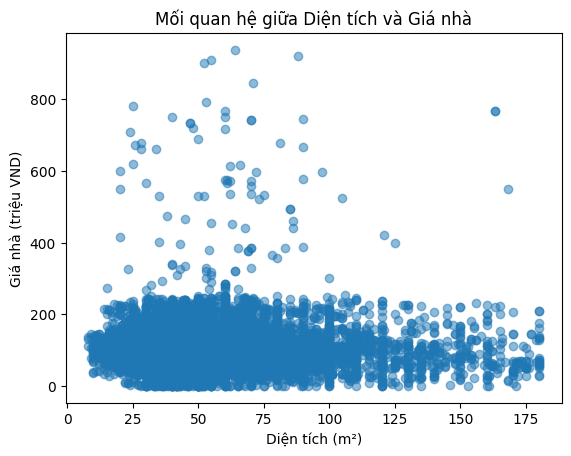

In [ ]:
# Ta sẽ xem xét mối quan hệ giữa Giá nhà và Diện tích căn nhà bằng scatter
plt.scatter(df['Diện tích'],df['Giá (triệu đồng/m2)'],alpha=0.5)
plt.title('Mối quan hệ giữa Diện tích và Giá nhà')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá nhà (triệu VND)')
plt.show()

* Ta sẽ xem phân phối giá bán bằng histogram

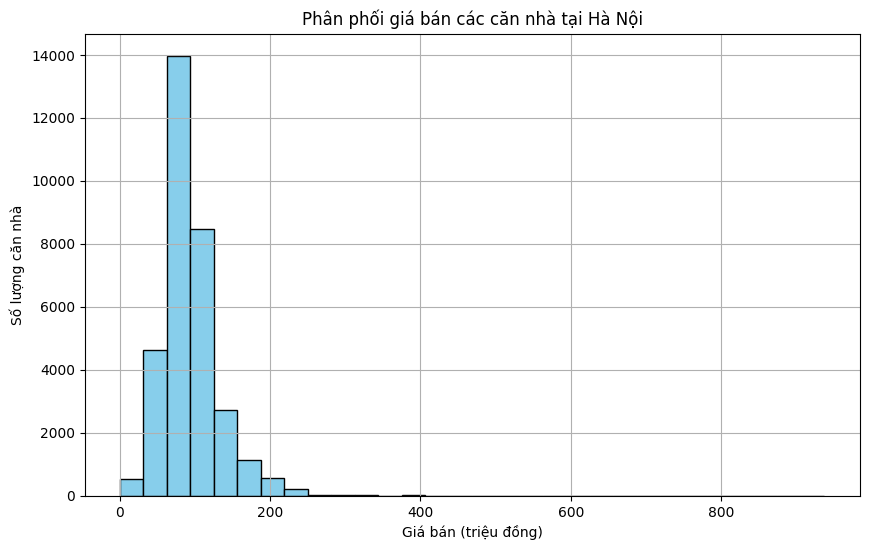

In [ ]:
# Vẽ histogram cho giá nhà và diện tích
plt.figure(figsize=(10, 6))
plt.hist(df['Giá (triệu đồng/m2)'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Giá bán (triệu đồng)')
plt.ylabel('Số lượng căn nhà')
plt.title('Phân phối giá bán các căn nhà tại Hà Nội')
plt.grid(True)
plt.show()


* Ta sẽ sử dụng PairPlot để xem mối tương quan giữa các biến trong dataframe

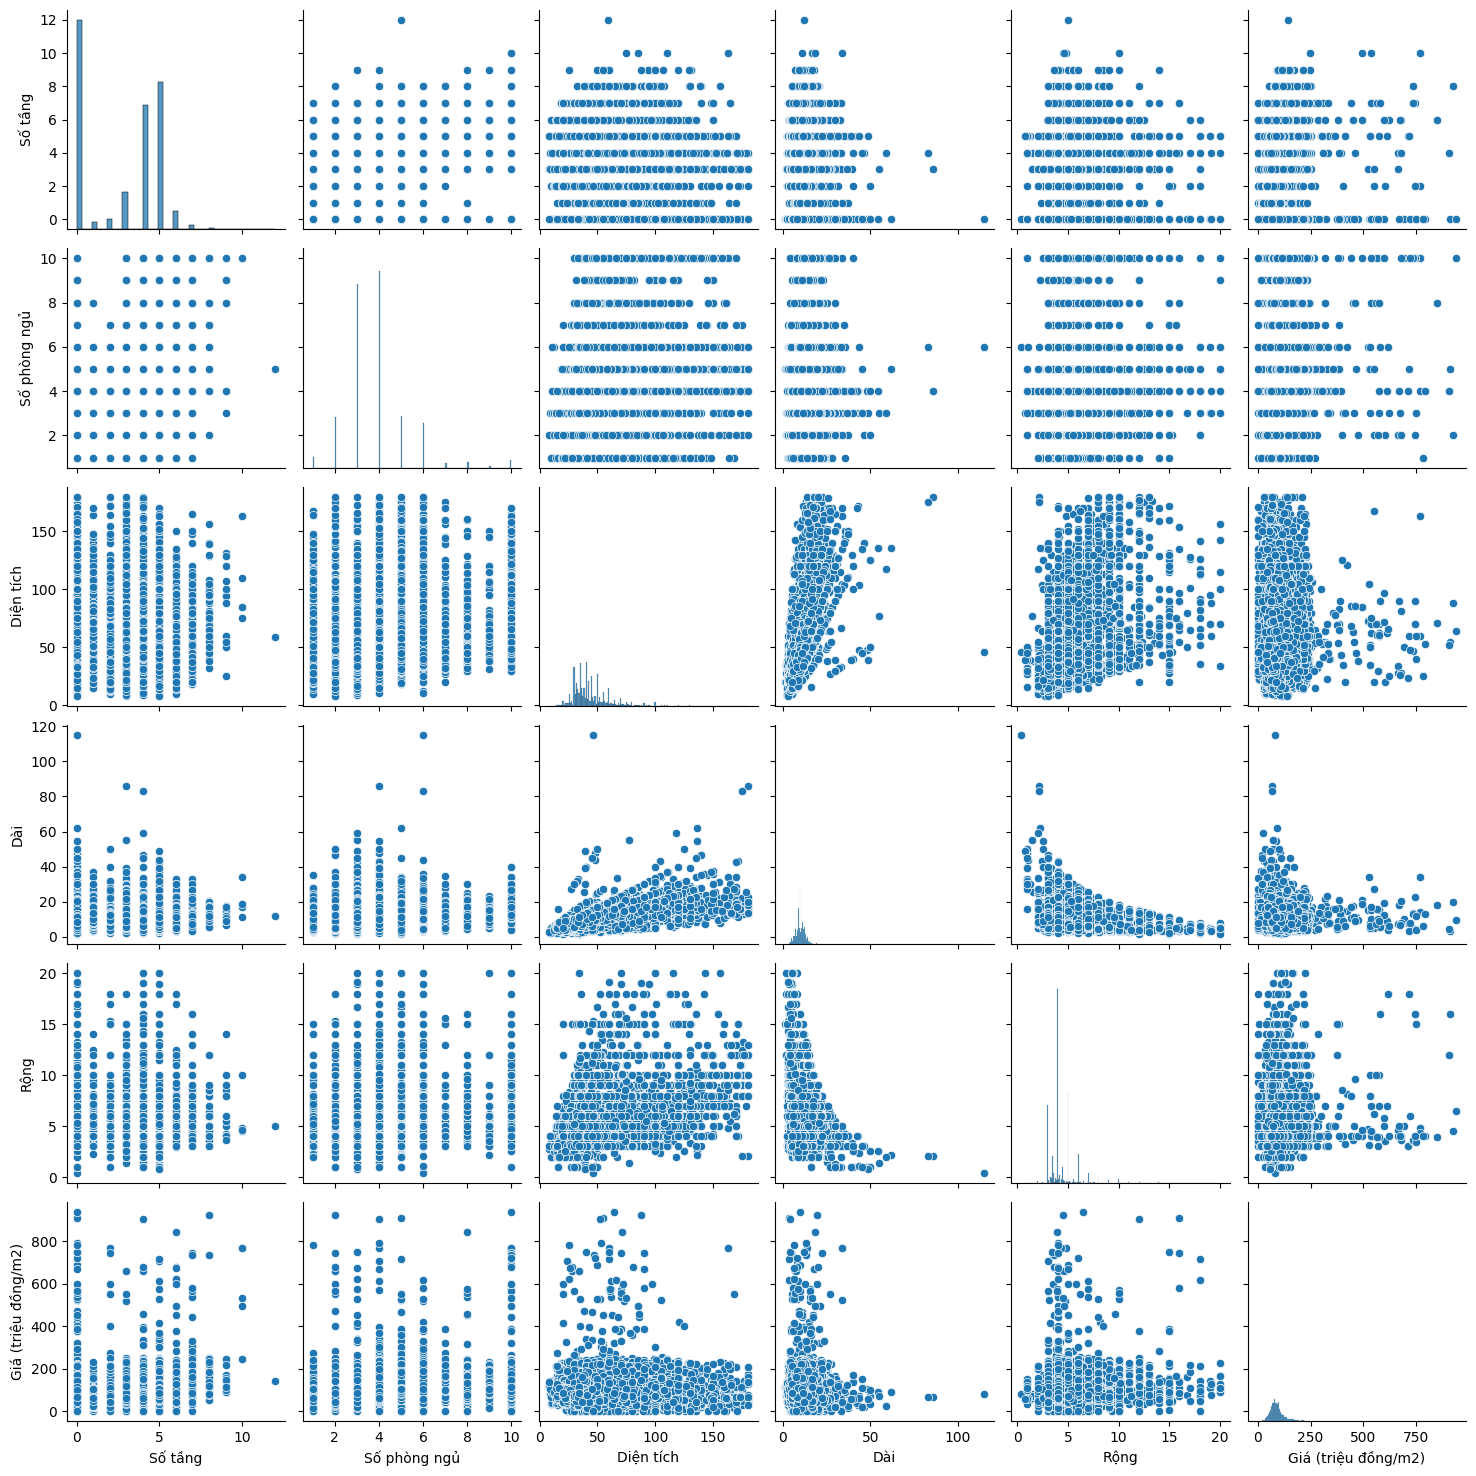

In [ ]:
# Chọn các cột số để vẽ pairplot
numeric_cols = ['Số tầng', 'Số phòng ngủ', 'Diện tích','Dài', 'Rộng','Giá (triệu đồng/m2)']
sns.pairplot(df[numeric_cols])
plt.show()

* Sử dụng heatmap để xem mối tương quan
* Giá trị gần 1: Tương quan dương mạnh.
* Giá trị gần -1: Tương quan âm mạnh.
* Giá trị gần 0: Không có tương quan.

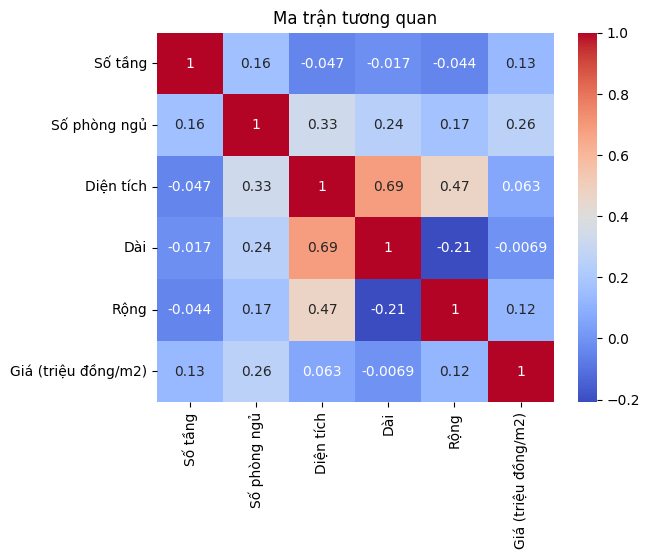

In [ ]:
corr_matrix = df[numeric_cols].corr()

# Vẽ heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

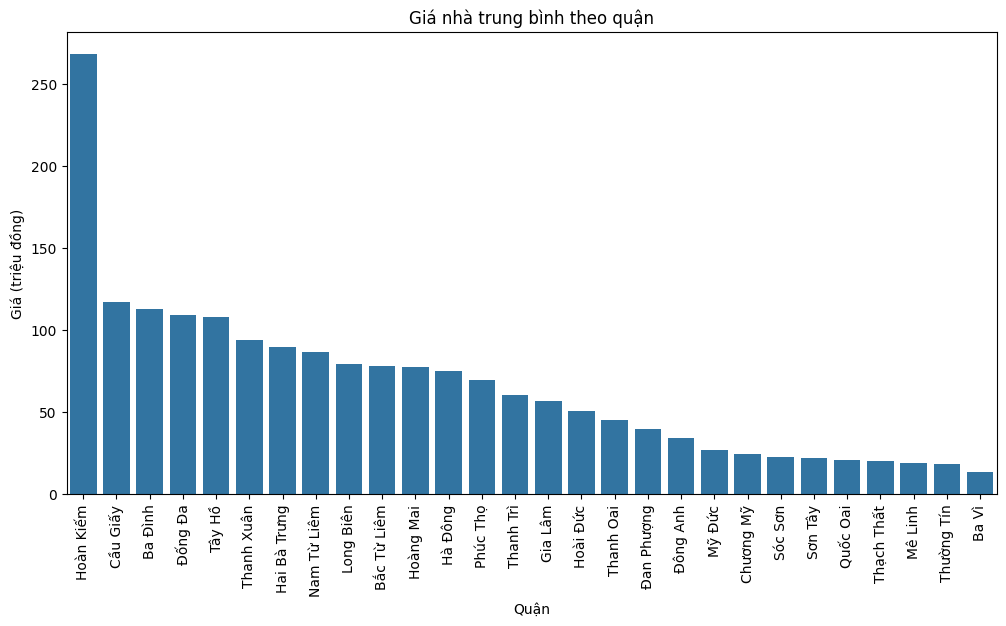

In [ ]:

# Tính giá trung bình theo quận
gia_trung_binh = df.groupby('Quận')['Giá (triệu đồng/m2)'].mean().reset_index().sort_values(by='Giá (triệu đồng/m2)', ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 6))
sns.barplot(x='Quận', y='Giá (triệu đồng/m2)', data=gia_trung_binh)
plt.title('Giá nhà trung bình theo quận')
plt.xlabel('Quận')
plt.ylabel('Giá (triệu đồng)')
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc
plt.show()

* Tổng kết:
* Dễ dàng nhận thấy giá nhà ở Việt Nam phụ thuộc khá nhiều vào vị trí của căn nhà
* Ở những khu vực nội thành giá nhà vô cùng cao dù diện tích nhỏ
* Trái lại ở các khu vực nội thành giá nhà lại rất rẻ do ko có nhu cầu trong kinh doanh hay sinh sống



### 2.4 Điều chỉnh tệp dữ liệu đầu vào



---



In [ ]:
# Loại bỏ cột chiều dài
df = df.drop('Dài', axis=1)

In [ ]:
# Lọc và giữ lại các dòng có giá trị 'Giá (triệu đồng/m2)' nhỏ hơn 220
df = df[df['Giá (triệu đồng/m2)'] <= 120]

# In ra số lượng hàng sau khi lọc
print(df.shape)

(22475, 10)


In [ ]:
df.describe()

,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá (triệu đồng/m2)
count,32344.000000,32344.000000,32344.000000,32344.000000,32344.000000,32344.000000
mean,2.724926,3.850451,45.808425,10.668464,4.404293,93.880291
std,2.263339,1.442373,19.957601,3.854126,1.465503,43.781809
min,0.000000,1.000000,8.000000,1.300000,0.400000,0.000050
25%,0.000000,3.000000,34.000000,8.300000,3.650000,70.210000
50%,4.000000,4.000000,40.000000,10.000000,4.000000,87.500000
75%,5.000000,4.000000,51.000000,12.400000,5.000000,107.690000
max,12.000000,10.000000,180.000000,115.000000,20.000000,937.500000


In [ ]:
# Loại bỏ những dòng có giá trị "Hoàn Kiếm"
df = df[df['Quận'] != 'Hoàn Kiếm']

In [ ]:
# Loại bỏ những dòng có giá trị Giá < 60
df = df[df['Giá (triệu đồng/m2)'] >= 60]



*   Bây giờ ta sẽ tiến hành trực quan hóa dữ liệu để xem xu hướng trong dữ liệu để lựa chọn mô hình dự đoán hợp lý
*   Trước hết ta sẽ xem xét quan hệ tuyến tính và phi tuyến tính
*   Quan hệ tuyến tính là các đặc trưng có tỷ lệ với nhau
*   Quan hệ phi tuyến là các đặc trưng không có tỷ lệ với nhau



### 2.5 Chia tệp dữ liệu và mã hóa

* Trước hết ta cần thực hiện mã hóa các đặc trưng để đưa vào mô hình dự đoán
* Đối với cột "Loại hình nhà ở" và "Giấy tờ pháp lý" ta sẽ sử dụng One-hot Encoding để mã hóa do số lượng giá trị ít
* Đối với cột "Quận", "Huyện", ta sẽ sử dụng Target Encoding để mã hóa vì các cột này có nhiều giá trị riêng lần lượt là 28 giá trị và 284 giá trị

In [ ]:
# Tạo bản sao của df
df_copy = df
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
Index: 32344 entries, 2 to 82362
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Quận                 32344 non-null  object 
 1   Huyện                32344 non-null  object 
 2   Loại hình nhà ở      32344 non-null  object 
 3   Giấy tờ pháp lý      32344 non-null  object 
 4   Số tầng              32344 non-null  int64  
 5   Số phòng ngủ         32344 non-null  int64  
 6   Diện tích            32344 non-null  float64
 7   Dài                  32344 non-null  float64
 8   Rộng                 32344 non-null  float64
 9   Giá (triệu đồng/m2)  32344 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 2.7+ MB


* Ta sẽ tiến hành chia df_copy thành 2 tệp là tệp train và tệp test với tỷ lệ là 80/20

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm thử (80% huấn luyện, 20% kiểm thử)
df_train, df_test = train_test_split(df_copy, test_size=0.2, random_state=42)

# Xem số lượng bản ghi của 2 tệp
print("Kích thước tập huấn luyện:", df_train.shape)
print("Kích thước tập kiểm thử:", df_test.shape)

Kích thước tập huấn luyện: (25875, 10)
Kích thước tập kiểm thử: (6469, 10)


* Áp dụng One-hot Encoding cho hai tệp train và test

In [ ]:

# Thực hiện One-Hot Encoding cho 2 cột: "Loại hình nhà ở" và "Giấy tờ pháp lý"
df_train = pd.get_dummies(df_train, columns=['Loại hình nhà ở', 'Giấy tờ pháp lý'], drop_first=True)

# Làm với df_test thì tương tự
df_test = pd.get_dummies(df_test, columns=['Loại hình nhà ở', 'Giấy tờ pháp lý'], drop_first=True)

# Kiểm tra kết quả
print(df_train.head())
print(df_test.head())

            Quận             Huyện  Số tầng  Số phòng ngủ  Diện tích   Dài  \
35866     Tây Hồ   Phường Nhật Tân        0             3       46.0   9.2   
38196    Hà Đông  Phường Kiến Hưng        4             4       40.0  10.0   
52394     Tây Hồ       Phường Bưởi        0             6       43.0  14.3   
33237    Hà Đông     Phường Mộ Lao        7            10       80.0  20.0   
41025  Hoàng Mai   Phường Lĩnh Nam        0             5       37.0  12.3   

       Rộng  Giá (triệu đồng/m2)  Loại hình nhà ở_Nhà mặt phố, mặt tiền  \
35866   5.0                70.65                                  False   
38196   4.0                60.75                                  False   
52394   3.0                86.05                                  False   
33237   4.0               103.75                                  False   
41025   3.0                90.54                                  False   

       Loại hình nhà ở_Nhà ngõ, hẻm  Loại hình nhà ở_Nhà phố liền kề  \
35866   

In [ ]:
# Kiểm tra kết quả
print(df_train.head(5))
print(df_test.head(5))

            Quận             Huyện  Số tầng  Số phòng ngủ  Diện tích   Dài  \
35866     Tây Hồ   Phường Nhật Tân        0             3       46.0   9.2   
38196    Hà Đông  Phường Kiến Hưng        4             4       40.0  10.0   
52394     Tây Hồ       Phường Bưởi        0             6       43.0  14.3   
33237    Hà Đông     Phường Mộ Lao        7            10       80.0  20.0   
41025  Hoàng Mai   Phường Lĩnh Nam        0             5       37.0  12.3   

       Rộng  Giá (triệu đồng/m2)  Loại hình nhà ở_Nhà mặt phố, mặt tiền  \
35866   5.0                70.65                                  False   
38196   4.0                60.75                                  False   
52394   3.0                86.05                                  False   
33237   4.0               103.75                                  False   
41025   3.0                90.54                                  False   

       Loại hình nhà ở_Nhà ngõ, hẻm  Loại hình nhà ở_Nhà phố liền kề  \
35866   

* Bây giờ ta sẽ mã hóa cột "Quận" và "Huyện" bằng Target-Encoding

In [ ]:
# Khởi tạo Target Encoder
target_encoder = ce.TargetEncoder(cols=['Quận', 'Huyện'])

# Áp dụng Target Encoding trên tập huấn luyện
df_train[['Quận_encoded', 'Huyện_encoded']] = target_encoder.fit_transform(df_train[['Quận', 'Huyện']], df_train['Giá (triệu đồng/m2)'])

# Áp dụng Target Encoding trên tập kiểm thử, nhưng chỉ dùng transform (không fit lại)
df_test[['Quận_encoded', 'Huyện_encoded']] = target_encoder.transform(df_test[['Quận', 'Huyện']])

# Kiểm tra kết quả sau khi mã hóa
print(df_train[['Quận', 'Quận_encoded', 'Huyện', 'Huyện_encoded']].head())
print(df_test[['Quận', 'Quận_encoded', 'Huyện', 'Huyện_encoded']].head())

            Quận  Quận_encoded             Huyện  Huyện_encoded
35866     Tây Hồ    107.159252   Phường Nhật Tân     106.450754
38196    Hà Đông     75.311990  Phường Kiến Hưng      68.144297
52394     Tây Hồ    107.159252       Phường Bưởi     114.899000
33237    Hà Đông     75.311990     Phường Mộ Lao      92.563167
41025  Hoàng Mai     77.750761   Phường Lĩnh Nam      71.050741
             Quận  Quận_encoded               Huyện  Huyện_encoded
48965   Hoàng Mai     77.750761      Phường Đại Kim      80.107048
3660       Tây Hồ    107.159252         Phường Bưởi     114.899000
46832  Thanh Xuân     94.103927  Phường Khương Đình      86.515757
43827   Hoàng Mai     77.750761     Phường Giáp Bát      82.654462
71312     Đống Đa    109.389064    Phường Ô Chợ Dừa     106.589651


In [ ]:
# Tạo DataFrame cho Quận
df_quan = df_train[['Quận', 'Quận_encoded']].drop_duplicates()
df_quan.to_csv('/content/drive/MyDrive/Colab Notebooks/df_quan.csv', index=False)

# Tạo DataFrame cho Huyện
df_huyen = df_train[['Huyện', 'Huyện_encoded']].drop_duplicates()
df_huyen.to_csv('/content/drive/MyDrive/Colab Notebooks/df_huyen.csv', index=False)

In [ ]:
df_train.loc[df_train['Quận'] == 'Mỹ Đức','Huyện'].unique()

array(['Xã Hợp Thanh'], dtype=object)

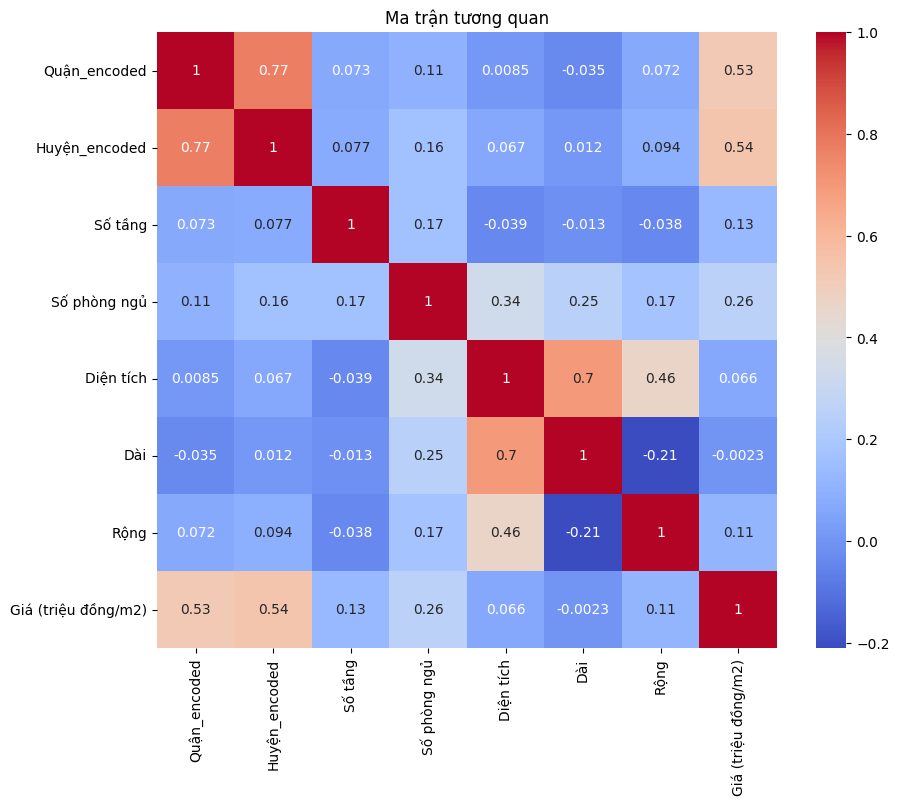

In [ ]:
# Vẽ heatmap bằng corr để xem mối tương quan của df_train
numeric_cols2 = ['Quận_encoded','Huyện_encoded','Số tầng', 'Số phòng ngủ', 'Diện tích','Dài', 'Rộng','Giá (triệu đồng/m2)']
corr_matrix = df_train[numeric_cols2].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan')
plt.show()

* Bây giờ ta sẽ chia tệp df_train và df_test thành X( chứa các nhãn dùng để dự đoán) và y( chứa biến mục tiêu)

In [ ]:
# Chia tập huấn luyện
X_train = df_train.drop('Giá (triệu đồng/m2)', axis=1)  # Các đặc trưng
y_train = df_train['Giá (triệu đồng/m2)']  # Biến mục tiêu

# Chia tập kiểm thử
X_test = df_test.drop('Giá (triệu đồng/m2)', axis=1)  # Các đặc trưng
y_test = df_test['Giá (triệu đồng/m2)']  # Biến mục tiêu


In [ ]:
# Kiểm tra kết quả của tệp X
print(X_train.head())
print(X_test.head())

            Quận             Huyện  Số tầng  Số phòng ngủ  Diện tích   Dài  \
35866     Tây Hồ   Phường Nhật Tân        0             3       46.0   9.2   
38196    Hà Đông  Phường Kiến Hưng        4             4       40.0  10.0   
52394     Tây Hồ       Phường Bưởi        0             6       43.0  14.3   
33237    Hà Đông     Phường Mộ Lao        7            10       80.0  20.0   
41025  Hoàng Mai   Phường Lĩnh Nam        0             5       37.0  12.3   

       Rộng  Loại hình nhà ở_Nhà mặt phố, mặt tiền  \
35866   5.0                                  False   
38196   4.0                                  False   
52394   3.0                                  False   
33237   4.0                                  False   
41025   3.0                                  False   

       Loại hình nhà ở_Nhà ngõ, hẻm  Loại hình nhà ở_Nhà phố liền kề  \
35866                          True                            False   
38196                          True                           

In [ ]:
# Kiểm tra kết quả y
print(y_train.head(5))
print(y_test.head(5))

35866     70.65
38196     60.75
52394     86.05
33237    103.75
41025     90.54
Name: Giá (triệu đồng/m2), dtype: float64
48965     80.65
3660     161.22
46832     60.42
43827     50.77
71312    212.50
Name: Giá (triệu đồng/m2), dtype: float64


* Bây giờ ta sẽ loại bỏ những cột không dùng tới để chuẩn bị đưa dataframe vào mô hình học máy

In [ ]:
# Loại bỏ cột "Quận" và "Huyện" gốc (chưa mã hóa)
X_train = X_train.drop(columns=['Quận', 'Huyện'])
X_test = X_test.drop(columns=['Quận', 'Huyện'])

# Kiểm tra lại X_train và X_test sau khi đã loại bỏ cột
print(X_train.head())
print(X_test.head())

       Số tầng  Số phòng ngủ  Diện tích   Dài  Rộng  \
35866        0             3       46.0   9.2   5.0   
38196        4             4       40.0  10.0   4.0   
52394        0             6       43.0  14.3   3.0   
33237        7            10       80.0  20.0   4.0   
41025        0             5       37.0  12.3   3.0   

       Loại hình nhà ở_Nhà mặt phố, mặt tiền  Loại hình nhà ở_Nhà ngõ, hẻm  \
35866                                  False                          True   
38196                                  False                          True   
52394                                  False                          True   
33237                                  False                          True   
41025                                  False                          True   

       Loại hình nhà ở_Nhà phố liền kề  Giấy tờ pháp lý_Không có  \
35866                            False                      True   
38196                            False                     False

In [ ]:
# Xem các cột của X_train
print(X_train.columns)

Index(['Số tầng', 'Số phòng ngủ', 'Diện tích', 'Dài', 'Rộng',
       'Loại hình nhà ở_Nhà mặt phố, mặt tiền', 'Loại hình nhà ở_Nhà ngõ, hẻm',
       'Loại hình nhà ở_Nhà phố liền kề', 'Giấy tờ pháp lý_Không có',
       'Giấy tờ pháp lý_Đang chờ sổ', 'Giấy tờ pháp lý_Đã có sổ',
       'Quận_encoded', 'Huyện_encoded'],
      dtype='object')


## III. HUẤN LUYỆN MÔ HÌNH VÀ ĐÁNH GIÁ


### 3.1 Lựa chọn mô hình

* Như những phân tích ở trên ta dễ dàng nhận thấy để dự đoán giá của 1 căn nhà tại Hà Nội (Việt Nam) là không hề dễ dàng do nhiều đặc trưng phi tuyến tính và nhiều yếu tố khác tác động
* Để giải quyết bài toán ta sẽ sử dụng các mô hình như sau:
1.   Linear Regession: Mô hình đơn giản nhưng vẫn hoạt động tốt trong các bài toán về bất động sản
2.   Random Forest Regession: Linh hoạt có thể áp dụng cho bài toán phân loại và hồi quy, hoạt động tốt với các đặc trưng phi tuyến và hiệu suất cao
3.   Gradient Boosting: Hoạt động tốt với các đặc trưng có mối quan hệ phức tạp và có nhiều biến động
4.   XGBoost: Mô hình phổ biến trong dự đoán giá nhà có khả năng tối ưu hóa tốt về hiệu suất và độ chính xác




* Ta sẽ cần các chỉ số để đánh giá mô hình hồi quy. Bộ số liệu được sử dụng để đánh giá bao gồm:

1.   R-square (R²): Chỉ số R-square đo lường mức độ giải thích của mô hình đối với biến phụ thuộc. Giá trị của R-square dao động từ 0 đến 1, trong đó giá trị càng gần 1 thì mô hình càng tốt. R-square được tính bằng tổng phương sai được giải thích bởi mô hình chia cho tổng phương sai của biến phụ thuộc.
2.   Mean Absolute Error (MAE): MAE cũng đo lường sai số trung bình của mô hình so với dữ liệu thực tế, tuy nhiên MAE tính toán trung bình giá trị tuyệt đối của sai số. Giá trị MAE càng nhỏ thì mô hình càng tốt.
3.   Root Mean Square Error (RMSE): RMSE đo lường sai số trung bình của mô hình so với dữ liệu thực tế. Giá trị RMSE càng nhỏ thì mô hình càng tốt. RMSE được tính bằng căn bậc hai của trung bình bình phương của sai số giữa giá trị dự đoán và giá trị thực tế.
4.   MSE (Mean Square Error) có lẽ là một metric phổ biến nhất trong các bài toán hồi quy. Về cơ bản, nó tính trung bình của bình phương sai số giữa giá trị thực tế và giá trị dự đoán
5.   R-square-adjust:



### 3.2 Huấn luyện và đánh giá

* Ta sẽ khởi động với mô hình đơn giản nhất đó là Linear Regression

In [ ]:
# Khởi tạo mô hình Linear Regression
model = LinearRegression()

# Huấn luyện mô hình trên tập huấn luyện
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

In [ ]:
# Đánh giá mô hình bằng cách in ra các chỉ số
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 21.824785519676237
Mean Squared Error (MSE): 1101.539961135424
Root Mean Squared Error (RMSE): 33.18945557154296
R-squared (R2): 0.42373884359890235


* Có vẻ Linear Regression đang không hoạt động quá tốt với tệp dữ liệu
* Chỉ số R2 rất thấp đồng nghĩa với việc mô hình không hoạt động tốt và có khả năng đã bị underfitting

---



* Ta sẽ chuyển qua một mô hình hoạt động tốt hơn với các đặc trưng phi tuyến và độ nhiễu cao đó là Random Forest Regression

In [ ]:
# Khởi tạo mô hình RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=200,max_depth=10, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
# Dự đoán trên tập kiểm thử
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Tính các chỉ số đánh giá
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)

# In kết quả
print(f"Random Forest Regression - Mean Absolute Error (MAE): {mae_rf}")
print(f"Random Forest Regression - Mean Squared Error (MSE): {mse_rf}")
print(f"Random Forest Regression - Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"Random Forest Regression - R-squared (R²): {r2_rf}")

Random Forest Regression - Mean Absolute Error (MAE): 19.534781883608133
Random Forest Regression - Mean Squared Error (MSE): 883.2107703018369
Random Forest Regression - Root Mean Squared Error (RMSE): 29.718862197295454
Random Forest Regression - R-squared (R²): 0.5379558819496436


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


* Có vẻ RFR cũng chỉ phần nào cải thiện được hiệu suất, hiệu suất của mô hình vẫn khá thấp nên ta sẽ chuyển sang mô hình khác


---



* Ta sẽ cùng thử nghiệm với Gradient Bosting

In [ ]:
# Khởi tạo Gradient Boosting với một số tham số cơ bản
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [ ]:
gbr.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
y_pred_train = gbr.predict(X_train)
y_pred_test = gbr.predict(X_test)

# Đánh giá trên tập train
print("Training Performance:")
print("MAE:", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("R-squared (R²):", r2_score(y_train, y_pred_train))

# Đánh giá trên tập test
print("Test Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))
print("R-squared (R²):", r2_score(y_test, y_pred_test))

Training Performance:
MAE: 19.23963461087214
MSE: 794.4747862309912
RMSE: 28.18642911457553
R-squared (R²): 0.5858003927890032
Test Performance:
MAE: 19.923320782856088
MSE: 901.7407307099015
RMSE: 30.028998163606815
R-squared (R²): 0.5282620925370368


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


* Gradient Bosting cũng cho ra kết quả tương tự với random forest nên ta sẽ chuyển sang XGbost

---



* Sử dụng mô hình cuối cùng đó là XGBost để dự đoán

In [ ]:
# Khởi tạo mô hình XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=6, random_state=42)

In [ ]:
# Huấn luyện mô hình XGBoost
xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Dự đoán trên tập test
y_pred_xgb = xgb_model.predict(X_test)

# Tính toán các chỉ số đánh giá
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Regression - Mean Absolute Error (MAE): {mae_xgb}")
print(f"XGBoost Regression - Mean Squared Error (MSE): {mse_xgb}")
print(f"XGBoost Regression - Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"XGBoost Regression - R-squared (R²): {r2_xgb}")


XGBoost Regression - Mean Absolute Error (MAE): 19.050826496346076
XGBoost Regression - Mean Squared Error (MSE): 898.4940537776505
XGBoost Regression - Root Mean Squared Error (RMSE): 29.974890388084
XGBoost Regression - R-squared (R²): 0.5299605636497065


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
